### Import

In [1]:
pip install git+https://github.com/prmiles/pyfod.git

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from pyfod.fod import caputo

In [3]:
from time import time

In [4]:
import matplotlib.pyplot as plt

### Memristor and Current dependency

In [ ]:
def f(t):
    return 10*np.sin(0.2*t)

In [ ]:
alpha = 0.9
k0=1
R_on=100
R_off=10000

In [ ]:
fd = []
x = []
M_alpha=[]
v=[]
for t in range(101):
    out = caputo(f=f, alpha=alpha, lower=0, upper=t, quadrature='rs', n=10000)
    fd.append(out['fd'])
    print('t={}, D^{}[10*np.sin(0.2*t)] = {}'.format(t, alpha, out['fd']))
    x.append(k0*fd[-1])
    M_alpha.append(R_on*x[-1] + R_off*(1-x[-1]))
    print('t={}, M = {}'.format(t, M_alpha[-1]))
    v.append(M_alpha[-1]*f(t))

t=0, D^0.9[10*np.sin(0.2*t)] = 0.0
t=0, M = 10000.0
t=1, D^0.9[10*np.sin(0.2*t)] = 2.065990603010365
t=1, M = -10453.306969802614
t=2, D^0.9[10*np.sin(0.2*t)] = 2.099066713341993
t=2, M = -10780.760462085731
t=3, D^0.9[10*np.sin(0.2*t)] = 1.990988080789403
t=3, M = -9710.781999815088
t=4, D^0.9[10*np.sin(0.2*t)] = 1.7788646411325
t=4, M = -7610.759947211749
t=5, D^0.9[10*np.sin(0.2*t)] = 1.4818821724010203
t=5, M = -4670.633506770101
t=6, D^0.9[10*np.sin(0.2*t)] = 1.1167964414032827
t=6, M = -1056.2847698924988
t=7, D^0.9[10*np.sin(0.2*t)] = 0.7008414934203744
t=7, M = 3061.6692151382936
t=8, D^0.9[10*np.sin(0.2*t)] = 0.25222739191587223
t=8, M = 7502.948820032866
t=9, D^0.9[10*np.sin(0.2*t)] = -0.210096033161702
t=9, M = 12079.95072830085
t=10, D^0.9[10*np.sin(0.2*t)] = -0.6669610664238244
t=10, M = 16602.91455759586
t=11, D^0.9[10*np.sin(0.2*t)] = -1.0996229350119062
t=11, M = 20886.26705661787
t=12, D^0.9[10*np.sin(0.2*t)] = -1.4904368285982925
t=12, M = 24755.324603123096
t=13, D^0

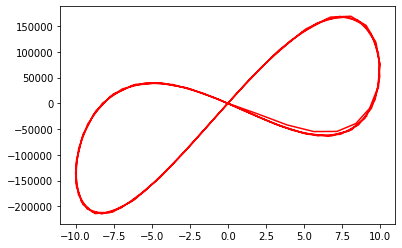

In [ ]:
plt.plot([f(t) for t in range(101)], v, c='r')

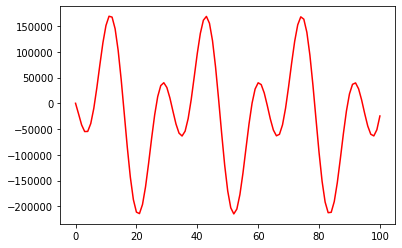

In [ ]:
plt.plot(range(101), v, c='r')

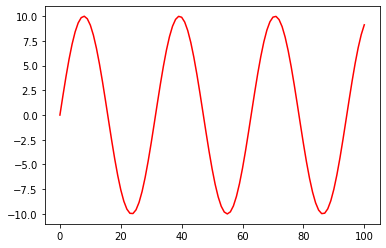

In [ ]:
plt.plot(range(101), [f(t) for t in range(101)], c='r')

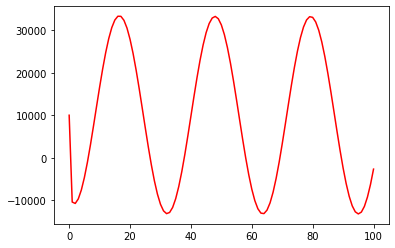

In [ ]:
plt.plot(range(101), M_alpha, c='r')

### IF neuron and current transformation

spike(t) - function of 0 and 1, that demonstrates spiketrain   
IF_neuron(t) - function of 0 and 1, that demonstrates spiketrain after transformation signal by neuron

In [ ]:
def spike(t):
    spikes=[1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1]*100
    return spikes[np.abs(int(t))]

In [ ]:
def IF_neuron(spike_def, t, threshold):
    transformed_spike=[]
    summ=0
    for i in range(t+1):
        summ+=spike_def(i)
        if summ >= threshold:
            transformed_spike.append(1)
            summ=0
        else:
            transformed_spike.append(0)
    return transformed_spike[t]

In [ ]:
if_neurons_t=[[], [], [], [], [], [], [], [], [], []]
for i in range(10):
    for t in range(25):
        if_neurons_t[i].append(IF_neuron(spike, t, i))

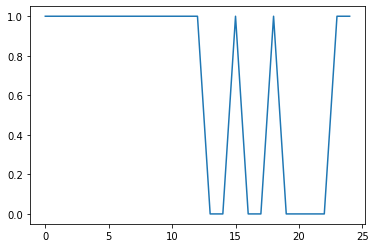

In [ ]:
plt.plot(range(25), if_neurons_t[1])

### i(t) curve from spikes

In [ ]:
spikes=[1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1]*100
points=[]
for t in range(50):
    points.append([t, spikes[t]])
    points.append([t+1, spikes[t]])

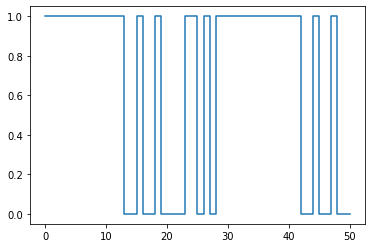

In [ ]:
plt.plot(np.array(points).T[0],np.array(points).T[1]) 

### Signal transform

In [ ]:
I_m = 0.2
omega = 5
def i(t):
    return I_m * np.sin(omega*t)

In [ ]:
fd = []
x = []
M_alpha=[]
v=[]
for t in range(120):
    out = caputo(f=i, alpha=alpha, lower=0, upper=t/20, quadrature='rs', n=10000)
    fd.append(out['fd'])
    print('t={}, D^{}[10*np.sin(0.2*t)] = {}'.format(t/20, alpha, out['fd']))
    x.append(k0*fd[-1])
    M_alpha.append(R_on*x[-1] + R_off*(1-x[-1]))
    print('t={}, M = {}'.format(t/20, M_alpha[-1]))
    v.append(M_alpha[-1]*i(t/20))

t=0.0, D^0.9[10*np.sin(0.2*t)] = 0.0
t=0.0, M = 10000.0
t=0.05, D^0.9[10*np.sin(0.2*t)] = 0.7581041375152304
t=0.05, M = 2494.7690385992187
t=0.1, D^0.9[10*np.sin(0.2*t)] = 0.7464432235102373
t=0.1, M = 2610.2120872486507
t=0.15, D^0.9[10*np.sin(0.2*t)] = 0.6671150588686104
t=0.15, M = 3395.5609172007566
t=0.2, D^0.9[10*np.sin(0.2*t)] = 0.5371856624528726
t=0.2, M = 4681.861941716562
t=0.25, D^0.9[10*np.sin(0.2*t)] = 0.36870156034996876
t=0.25, M = 6349.854552535309
t=0.3, D^0.9[10*np.sin(0.2*t)] = 0.1739561681916608
t=0.3, M = 8277.833934902557
t=0.35, D^0.9[10*np.sin(0.2*t)] = -0.03395162978284773
t=0.35, M = 10336.121134850193
t=0.4, D^0.9[10*np.sin(0.2*t)] = -0.241493644315559
t=0.4, M = 12390.787078724035
t=0.45, D^0.9[10*np.sin(0.2*t)] = -0.4353723418115261
t=0.45, M = 14310.186183934107
t=0.5, D^0.9[10*np.sin(0.2*t)] = -0.6032612039358436
t=0.5, M = 15972.285918964852
t=0.55, D^0.9[10*np.sin(0.2*t)] = -0.734525498419472
t=0.55, M = 17271.802434352772
t=0.6, D^0.9[10*np.sin(0.2*t

t=5.0, M = 1926.2475276867563
t=5.05, D^0.9[10*np.sin(0.2*t)] = 0.8505448206953735
t=5.05, M = 1579.6062751158024
t=5.1, D^0.9[10*np.sin(0.2*t)] = 0.8326683347264484
t=5.1, M = 1756.5834862081606
t=5.15, D^0.9[10*np.sin(0.2*t)] = 0.7630126067189987
t=5.15, M = 2446.1751934819126
t=5.2, D^0.9[10*np.sin(0.2*t)] = 0.6459083623698093
t=5.2, M = 3605.507212538888
t=5.25, D^0.9[10*np.sin(0.2*t)] = 0.48863629783262524
t=5.25, M = 5162.50065145701
t=5.3, D^0.9[10*np.sin(0.2*t)] = 0.30097443034963633
t=5.3, M = 7020.3531395386
t=5.35, D^0.9[10*np.sin(0.2*t)] = 0.09459018471220396
t=5.35, M = 9063.55717134918
t=5.4, D^0.9[10*np.sin(0.2*t)] = -0.11768498952676576
t=5.4, M = 11165.081396314981
t=5.45, D^0.9[10*np.sin(0.2*t)] = -0.3226533719151055
t=5.45, M = 13194.268381959544
t=5.5, D^0.9[10*np.sin(0.2*t)] = -0.5075714981916924
t=5.5, M = 15024.957832097753
t=5.55, D^0.9[10*np.sin(0.2*t)] = -0.6609424469695647
t=5.55, M = 16543.330224998692
t=5.6, D^0.9[10*np.sin(0.2*t)] = -0.7732306278430157
t=5

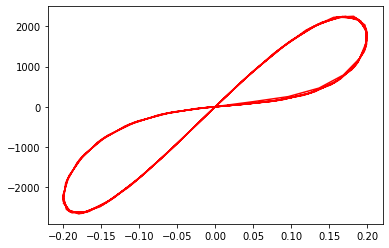

In [ ]:
plt.plot([i(t/20) for t in range(120)], v, 'r')

### Spikes

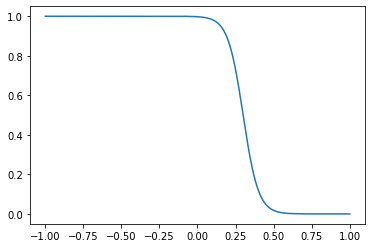

In [ ]:
x=np.linspace(-1,1,1000,endpoint=True)
sigmoid=-1/(1 + np.exp(-1*((x - 0.3)/0.05))) + 1
plt.plot(x, sigmoid)

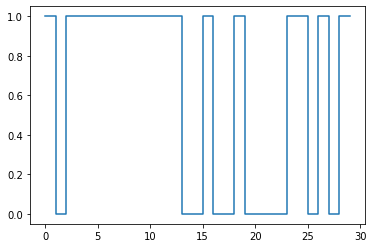

In [ ]:
spikes=[1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1]
points=[]
for i in range(len(spikes)):
    points.append([i, spikes[i]])
    points.append([i+1, spikes[i]])
plt.plot(np.array(points).T[0],np.array(points).T[1]) 

In [ ]:
spikes = [1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1]*2
# points current
points=[]
for i in range(len(spikes)):
    points.append([i, spikes[i]])
    points.append([i+1, spikes[i]])   
steps = []
for i in range(1, len(points)):
    # находим ступеньки
    if (points[i-1][1]==1) and (points[i][1]==0):
        steps.append([(i//2 - 0.5, i//2 + 0.5), i//2, -1])
    elif (points[i-1][1]==0) and (points[i][1]==1):
        steps.append([(i//2 - 0.5, i//2 + 0.5), i//2, 1])
            
def sigmoid_spikes(t):
    for j in range(len(steps)):
        if (steps[j][0][0] <= t) and (steps[j][0][1] > t):
            if steps[j][2] == -1:
                return -1/(1 + np.exp(-1*((t - steps[j][1])/0.05))) + 1
            else:
                return 1/(1 + np.exp(-1*((t - steps[j][1])/0.05)))
    return points[int(t)*2][1]

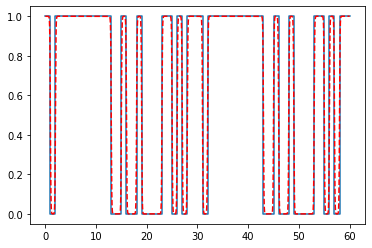

In [ ]:
spikes=[1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1]*2
# points current
points=[]
for i in range(len(spikes)):
    points.append([i, spikes[i]])
    points.append([i+1, spikes[i]])
plt.plot(np.array(points).T[0],np.array(points).T[1]) 
x=np.linspace(0,60,10000,endpoint=False)
sigmoid_f = np.array(list(map(sigmoid_spikes, x)))
plt.plot(x, sigmoid_f, 'r--')

In [ ]:
fd = []
x = []
M_alpha=[]
v=[]
f=np.vectorize(sigmoid_spikes)
for t in np.linspace(0,60,653,endpoint=False):
    out = caputo(f=f, alpha=alpha, lower=0, upper=t, quadrature='rs', n=10000)
    fd.append(out['fd'])
    #print('t={}, D^{}= {}'.format(t, alpha, out['fd']))
    x.append(k0*fd[-1])
    M_alpha.append(R_on*x[-1] + R_off*(1-x[-1]))
    #print('t={}, M = {}'.format(t, M_alpha[-1]))
    v.append(M_alpha[-1]*f(t))

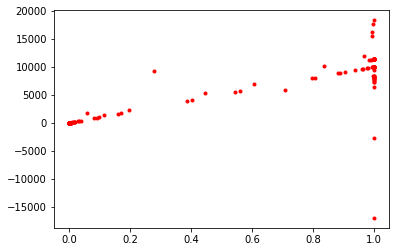

In [ ]:
plt.plot([np.vectorize(sigmoid_spikes)(t) for t in np.linspace(0,60,653,endpoint=False)][:250], v[:250], 'r.')

### sigmoid 2 (better)

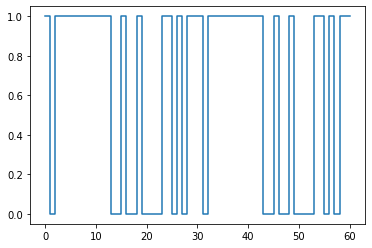

In [ ]:
spikes=[1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1]*2
points=[]
for i in range(len(spikes)):
    points.append([i, spikes[i]])
    points.append([i+1, spikes[i]])
plt.plot(np.array(points).T[0],np.array(points).T[1]) 

In [ ]:
spikes = [1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1]*2
# points current
points=[]
for i in range(len(spikes)):
    points.append([i, spikes[i]])
    points.append([i+1, spikes[i]])   
steps = []
for i in range(1, len(points)):
    # находим ступеньки
    if (points[i-1][1]==1) and (points[i][1]==0):
        steps.append([(i//2 - 0.5, i//2 + 0.5), i//2, -1])
    elif (points[i-1][1]==0) and (points[i][1]==1):
        steps.append([(i//2 - 0.5, i//2 + 0.5), i//2, 1])
steps_broad = []
steps_broad.append([(0, (steps[0][1] + steps[1][1])/2), steps[0][1], steps[0][2]])
for i in range(1, len(steps)-1):
    steps_broad.append([((steps[i-1][1] + steps[i][1])/2, (steps[i][1] + steps[i+1][1])/2), steps[i][1], steps[i][2]])
steps_broad.append([((steps[len(steps)-2][1] + steps[-1][1])/2, points[-1][0]), steps[-1][1], steps[-1][2]]) 
print(steps_broad)
def sigmoid_spikes(t):
    for j in range(len(steps_broad)):
        if (steps_broad[j][0][0] <= t) and (steps_broad[j][0][1] > t):
            if steps_broad[j][2] == -1:
                return -1/(1 + np.exp(-1*((t - steps_broad[j][1])/0.2))) + 1
            else:
                return 1/(1 + np.exp(-1*((t - steps_broad[j][1])/0.2)))
    return points[int(t)*2][1]

[[(0, 1.5), 1, -1], [(1.5, 7.5), 2, 1], [(7.5, 14.0), 13, -1], [(14.0, 15.5), 15, 1], [(15.5, 17.0), 16, -1], [(17.0, 18.5), 18, 1], [(18.5, 21.0), 19, -1], [(21.0, 24.0), 23, 1], [(24.0, 25.5), 25, -1], [(25.5, 26.5), 26, 1], [(26.5, 27.5), 27, -1], [(27.5, 29.5), 28, 1], [(29.5, 31.5), 31, -1], [(31.5, 37.5), 32, 1], [(37.5, 44.0), 43, -1], [(44.0, 45.5), 45, 1], [(45.5, 47.0), 46, -1], [(47.0, 48.5), 48, 1], [(48.5, 51.0), 49, -1], [(51.0, 54.0), 53, 1], [(54.0, 55.5), 55, -1], [(55.5, 56.5), 56, 1], [(56.5, 57.5), 57, -1], [(57.5, 60), 58, 1]]


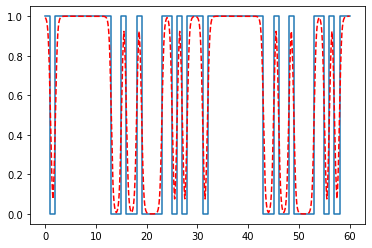

In [ ]:
# points current
points=[]
for i in range(len(spikes)):
    points.append([i, spikes[i]])
    points.append([i+1, spikes[i]])
plt.plot(np.array(points).T[0],np.array(points).T[1]) 
x=np.linspace(0,60,10000,endpoint=False)
sigmoid_f = np.array(list(map(sigmoid_spikes, x)))
plt.plot(x, sigmoid_f, 'r--')

In [ ]:
fd = []
x = []
M_alpha=[]
v=[]
f=np.vectorize(sigmoid_spikes)
for t in np.linspace(0,60,653,endpoint=False):
    out = caputo(f=f, alpha=alpha, lower=0, upper=t, quadrature='rs', n=10000)
    fd.append(out['fd'])
    #print('t={}, D^{}= {}'.format(t, alpha, out['fd']))
    x.append(k0*fd[-1])
    M_alpha.append(R_on*x[-1] + R_off*(1-x[-1]))
    #print('t={}, M = {}'.format(t, M_alpha[-1]))
    v.append(M_alpha[-1]*f(t))

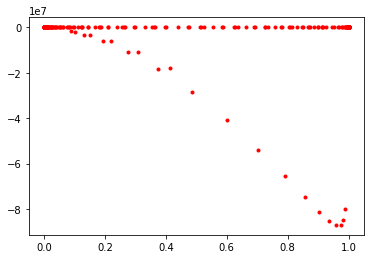

In [ ]:
plt.plot([np.vectorize(sigmoid_spikes)(t) for t in np.linspace(0,60,653,endpoint=False)][:250], v[:250], 'r.')

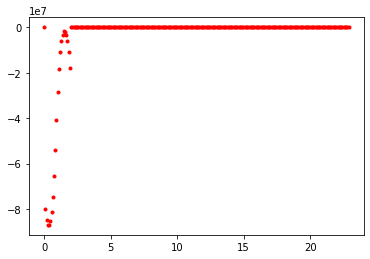

In [ ]:
plt.plot(np.linspace(0,60,653,endpoint=False)[:250], v[:250], 'r.')

### add neuron

In [ ]:
def IF_neuron(spike_def, low, upper, threshold):
    transformed_spike=[]
    summ=0
    for i in range(int(low), int(upper)+1):
        summ+=spike_def(i)
        if summ >= threshold:
            transformed_spike.append(1)
            summ=0
        else:
            transformed_spike.append(0)
    return transformed_spike

In [ ]:
IF_neuron_spike = IF_neuron(sigmoid_spikes, 0, 59, 10)

In [ ]:
spikes=IF_neuron_spike
# points current
points=[]
for i in range(len(spikes)):
    points.append([i, spikes[i]])
    points.append([i+1, spikes[i]])   
steps = []
for i in range(1, len(points)):
    # находим ступеньки
    if (points[i-1][1]==1) and (points[i][1]==0):
        steps.append([(i//2 - 0.5, i//2 + 0.5), i//2, -1])
    elif (points[i-1][1]==0) and (points[i][1]==1):
        steps.append([(i//2 - 0.5, i//2 + 0.5), i//2, 1])
steps_broad = []
steps_broad.append([(0, (steps[0][1] + steps[1][1])/2), steps[0][1], steps[0][2]])
for i in range(1, len(steps)-1):
    steps_broad.append([((steps[i-1][1] + steps[i][1])/2, (steps[i][1] + steps[i+1][1])/2), steps[i][1], steps[i][2]])
steps_broad.append([((steps[len(steps)-2][1] + steps[-1][1])/2, points[-1][0]), steps[-1][1], steps[-1][2]]) 
print(steps_broad)
def sigmoid_spikes(t):
    for j in range(len(steps_broad)):
        if (steps_broad[j][0][0] <= t) and (steps_broad[j][0][1] > t):
            if steps_broad[j][2] == -1:
                return -1/(1 + np.exp(-1*((t - steps_broad[j][1])/0.2))) + 1
            else:
                return 1/(1 + np.exp(-1*((t - steps_broad[j][1])/0.2)))
    return points[int(t)*2][1]

[[(0, 11.5), 11, 1], [(11.5, 22.0), 12, -1], [(22.0, 32.5), 32, 1], [(32.5, 38.0), 33, -1], [(38.0, 43.5), 43, 1], [(43.5, 60), 44, -1]]


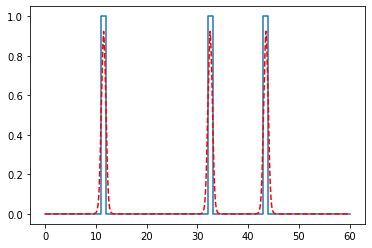

In [ ]:
# points current
points=[]
for i in range(len(spikes)):
    points.append([i, spikes[i]])
    points.append([i+1, spikes[i]])
plt.plot(np.array(points).T[0],np.array(points).T[1]) 
x=np.linspace(0,60,10000,endpoint=False)
sigmoid_f = np.array(list(map(sigmoid_spikes, x)))
plt.plot(x, sigmoid_f, 'r--')

In [ ]:
fd = []
x = []
M_alpha=[]
v=[]
f=np.vectorize(sigmoid_spikes)
for t in np.linspace(0,60,653,endpoint=False):
    out = caputo(f=f, alpha=alpha, lower=0, upper=t, quadrature='rs', n=10000)
    fd.append(out['fd'])
    #print('t={}, D^{}= {}'.format(t, alpha, out['fd']))
    x.append(k0*fd[-1])
    M_alpha.append(R_on*x[-1] + R_off*(1-x[-1]))
    #print('t={}, M = {}'.format(t, M_alpha[-1]))
    v.append(M_alpha[-1]*f(t))

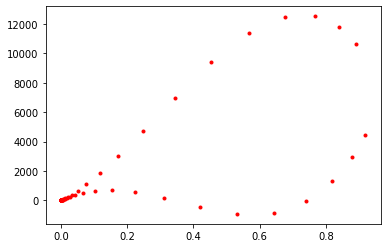

In [ ]:
plt.plot([np.vectorize(sigmoid_spikes)(t) for t in np.linspace(0,60,653,endpoint=False)][:250], v[:250], 'r.')

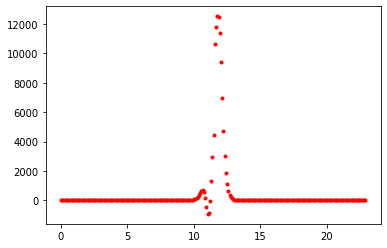

In [ ]:
plt.plot(np.linspace(0,60,653,endpoint=False)[:250], v[:250], 'r.')

### random spikes and current voltage curve of memristor

In [ ]:
spikes = np.random.randint(0, 2, 100)

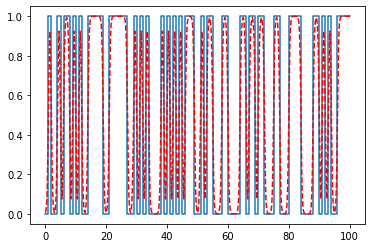

In [ ]:
# points current
points=[]
for i in range(len(spikes)):
    points.append([i, spikes[i]])
    points.append([i+1, spikes[i]])   
steps = []
for i in range(1, len(points)):
    # находим ступеньки
    if (points[i-1][1]==1) and (points[i][1]==0):
        steps.append([(i//2 - 0.5, i//2 + 0.5), i//2, -1])
    elif (points[i-1][1]==0) and (points[i][1]==1):
        steps.append([(i//2 - 0.5, i//2 + 0.5), i//2, 1])
steps_broad = []
steps_broad.append([(0, (steps[0][1] + steps[1][1])/2), steps[0][1], steps[0][2]])
for i in range(1, len(steps)-1):
    steps_broad.append([((steps[i-1][1] + steps[i][1])/2, (steps[i][1] + steps[i+1][1])/2), steps[i][1], steps[i][2]])
steps_broad.append([((steps[len(steps)-2][1] + steps[-1][1])/2, points[-1][0]), steps[-1][1], steps[-1][2]]) 
#print(steps_broad)
def sigmoid_spikes(t):
    for j in range(len(steps_broad)):
        if (steps_broad[j][0][0] <= t) and (steps_broad[j][0][1] > t):
            if steps_broad[j][2] == -1:
                return -1/(1 + np.exp(-1*((t - steps_broad[j][1])/0.2))) + 1
            else:
                return 1/(1 + np.exp(-1*((t - steps_broad[j][1])/0.2)))
    return points[int(t)*2][1]
# points current
points=[]
for i in range(len(spikes)):
    points.append([i, spikes[i]])
    points.append([i+1, spikes[i]])
plt.plot(np.array(points).T[0],np.array(points).T[1]) 
x=np.linspace(0,100,10000,endpoint=False)
sigmoid_f = np.array(list(map(sigmoid_spikes, x)))
plt.plot(x, sigmoid_f, 'r--')

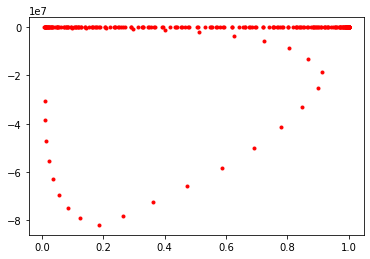

In [ ]:
fd = []
x = []
M_alpha=[]
v=[]
f=np.vectorize(sigmoid_spikes)
for t in np.linspace(0,100,1653,endpoint=False):
    out = caputo(f=f, alpha=alpha, lower=0, upper=t, quadrature='rs', n=10000)
    fd.append(out['fd'])
    #print('t={}, D^{}= {}'.format(t, alpha, out['fd']))
    x.append(k0*fd[-1])
    M_alpha.append(R_on*x[-1] + R_off*(1-x[-1]))
    #print('t={}, M = {}'.format(t, M_alpha[-1]))
    v.append(M_alpha[-1]*f(t))
plt.plot([np.vectorize(sigmoid_spikes)(t) for t in np.linspace(0,60,653,endpoint=False)][:250], v[:250], 'r.')

### classes for circuit creation

In [5]:
class smooth_current:
    spikes=None # spikes list
    # helpers for smoothing
    points=None 
    steps=None
    steps_broad=None
    max_t=None
    
    def __init__(self, spikes):
        self.spikes=spikes
        self.max_t = len(self.spikes)
        self.points=[]
        for i in range(self.max_t):
            self.points.append([i, self.spikes[i]])
            self.points.append([i+1, self.spikes[i]])   
        self.steps = []
        for i in range(1, len(self.points)):
            # находим ступеньки
            if (self.points[i-1][1]==1) and (self.points[i][1]==0):
                self.steps.append([(i//2 - 0.5, i//2 + 0.5), i//2, -1])
            elif (self.points[i-1][1]==0) and (self.points[i][1]==1):
                self.steps.append([(i//2 - 0.5, i//2 + 0.5), i//2, 1])
        self.steps_broad = []
        if len(self.steps)>1:
            self.steps_broad.append([(0, (self.steps[0][1] + self.steps[1][1])/2), self.steps[0][1], self.steps[0][2]])
            for i in range(1, len(self.steps)-1):
                self.steps_broad.append([((self.steps[i-1][1] + self.steps[i][1])/2, (self.steps[i][1] + self.steps[i+1][1])/2), self.steps[i][1], self.steps[i][2]])
            self.steps_broad.append([((self.steps[len(self.steps)-2][1] + self.steps[-1][1])/2, self.points[-1][0]), self.steps[-1][1], self.steps[-1][2]]) 

    # returns smooth curve points
    def sigmoid_spikes(self, t):
        for j in range(len(self.steps_broad)):
            if (self.steps_broad[j][0][0] <= t) and (self.steps_broad[j][0][1] > t):
                if self.steps_broad[j][2] == -1:
                    return -1/(1 + np.exp(-1*((t - self.steps_broad[j][1])/0.2))) + 1
                else:
                    return 1/(1 + np.exp(-1*((t - self.steps_broad[j][1])/0.2)))
        return self.points[int(t)*2][1]
    
    def draw_smooth(self):
        plt.plot(np.array(self.points).T[0],np.array(self.points).T[1]) 
        x=np.linspace(0,self.max_t,self.max_t*100,endpoint=False)
        sigmoid_f = np.array(list(map(self.sigmoid_spikes, x)))
        plt.plot(x, sigmoid_f, 'r--')
        
    def get_plot_curve(self):
        x=np.linspace(0,self.max_t,self.max_t*100,endpoint=False)
        sigmoid_f = np.array(list(map(self.sigmoid_spikes, x)))
        plt.plot()
        return np.array(self.points).T[0],np.array(self.points).T[1], x, sigmoid_f, 'r--'

In [6]:
class memristor:
    # i(t) function
    #i=None
    # range for plots
    low=0
    upper=None
    # fd calculation parameters
    alpha=None
    k0=None
    R_on = None
    R_off = None
    fd = []
    x = []
    M_alpha=[]
    v=[]
    current=[]
    now_time=0
    
    
    def __init__(self, alpha, k0, low, upper, R_on, R_off):
        self.alpha=alpha
        self.k0=k0
        self.R_on = R_on
        self.R_off = R_off
        #self.i=i
        self.low=low
        self.upper=upper
        self.fd = []
        self.x = []
        self.M_alpha=[]
        self.v=[]
        self.current=[]
        self.now_time = 0
        
        #self.calculate_fd()
        
#     def calculate_fd(self):
#         self.fd = []
#         self.x = []
#         self.M_alpha=[]
#         self.v=[]
#         f=np.vectorize(self.i)
#         for t in np.linspace(self.low,self.upper,(self.upper-self.low)*2+19,endpoint=False):
#             out = caputo(f=f, alpha=self.alpha, lower=0, upper=t, quadrature='rs', n=150)
#             self.fd.append(out['fd'])
#             self.x.append(self.k0*self.fd[-1])
#             self.M_alpha.append(self.R_on*self.x[-1] + self.R_off*(1-self.x[-1]))
#             self.v.append(self.M_alpha[-1]*f(t))
            
    def draw_current_voltage(self):
        #plt.plot([np.vectorize(self.i)(t) for t in np.linspace(self.low,self.upper,(self.upper-self.low)*2+19,endpoint=False)], self.v, 'r.')
        plt.plot(self.current, self.v, 'r.')
        
    def get_plot_lists(self):
        #return [np.vectorize(self.i)(t) for t in np.linspace(self.low,self.upper,(self.upper-self.low)*2+19,endpoint=False)], self.v, 'r.'
        return self.current, self.v, 'r.'
    
    def fill_next_time(self, i):
        t = self.now_time
        # i(t)- current from 0 to t
        f=np.vectorize(i)
        out = caputo(f=f, alpha=self.alpha, lower=0, upper=t, quadrature='rs', n=150)
        self.fd.append(out['fd'])
        self.x.append(self.k0*self.fd[-1])
        self.M_alpha.append(self.R_on*self.x[-1] + self.R_off*(1-self.x[-1]))
        self.v.append(self.M_alpha[-1]*f(t))
        self.current.append(f(t))
        # next iteration
        self.now_time += 1
            
            
    def get_M_at_time(self, time):
        return self.M_alpha[time]

In [7]:
class IF_neuron:
    threshold = None
    def __init__(self, threshold):
        self.threshold=threshold
    
    def transform(self, spike_def, low, upper):
        transformed_spike=[]
        summ=0
        for i in range(int(low), int(upper)):
            summ+=spike_def(i)
            if summ >= self.threshold:
                transformed_spike.append(1)
                summ=0
            else:
                transformed_spike.append(0)
        return transformed_spike

### graph

In [8]:
import networkx as nx

In [9]:
class neurons_graph(nx.DiGraph):
    
    input_currents = []
    output_currents = []
    synapses=None
    size = 0 # max_t размер массива спайков
    input_currents_now = []
    output_currents_now = []
    
    def __init__(self):
        nx.DiGraph.__init__(self)
        
    def add_weighted_edges_from(self, lst):
        super().add_weighted_edges_from(lst)
        self.input_currents = []
        self.output_currents = []
        for i in range(len(self.nodes)):
            self.input_currents.append(None)
            self.output_currents.append(None)
            self.input_currents_now.append(None)
            self.output_currents_now.append(None)
        self.synapses = []
        
    def set_synapses(self,alpha, k0, low, upper, R_on, R_off):
        for i in range(len(self.edges)):
            node=list(self.edges)[i][0]
            node2=list(self.edges)[i][1]
            ind_node=list(self.nodes).index(node)
            self.synapses.append([memristor(alpha, self.output_currents[ind_node].sigmoid_spikes, k0, low, upper, R_on, R_off), node, node2])
    
    def set_input_current_to_node(self, node, smooth_current_instance):
        ind=list(self.nodes).index(node)
        self.input_currents[ind] = smooth_current_instance
        
    def set_output_current_to_node(self, node, smooth_current_instance):
        ind=list(self.nodes).index(node)
        self.output_currents[ind] = smooth_current_instance
        
    
    def none_in_predecessors(self, node):
        for pred in self.predecessors(node):
            if self.output_currents[list(self.nodes).index(pred)] == None:
                return True
        return False
                
                
    def calculate_input_and_output_current_of_node(self, node, threshold):
        
        # self.predecessors - sum currents
        spikes = []
        for pred in self.predecessors(node):
            if self.output_currents[list(self.nodes).index(pred)] != None:
                if len(spikes)==0:
                    spikes = self.output_currents[list(self.nodes).index(pred)].spikes
                else:
                    pred_spikes=self.output_currents[list(self.nodes).index(pred)].spikes
                    spikes = self.sum_spikes(spikes, pred_spikes)
                    
        if len(spikes)!=0:
            self.set_input_current_to_node(node, smooth_current(spikes))
            self.calculate_output_current_of_node(node, threshold)
            
            
            
    def calculate_input_and_output_current_of_node_NOW(self, node, threshold):
        ind=list(self.nodes).index(node)
        
        # self.predecessors - sum currents
        self.input_currents_now[ind] = 0
        for pred in self.predecessors(node):
            if self.output_currents_now[list(self.nodes).index(pred)] != None:
                mem = 0
                for syn in self.synapses:
                    if syn[1]==pred and syn[2]==node:
                        print(syn[0].M_alpha, pred, node)
                        mem = syn[0].M_alpha[-1]
                        break
                self.input_currents_now[ind] += mem * self.output_currents_now[list(self.nodes).index(pred)]
        # добавляем допольнительный спайк
        if self.input_currents[ind] == None:
            spikes = [self.input_currents_now[ind]]
        else:
            spikes = np.append(self.input_currents[ind].spikes,self.input_currents_now[ind])
        self.set_input_current_to_node(node, smooth_current(spikes))
        self.calculate_output_current_of_node(node, threshold)
        self.output_currents_now[ind] = self.output_currents[ind].spikes[-1]
            
    def calculate_output_current_of_node(self, node, threshold):
        transformed_spikes=IF_neuron(threshold).transform(self.input_currents[list(self.nodes).index(node)].sigmoid_spikes, 0, self.input_currents[list(self.nodes).index(node)].max_t)
        self.set_output_current_to_node(node, smooth_current(transformed_spikes))
        
    def sum_spikes(self, s1, s2):
        return [1  if el!=0 else 0 for el in (np.array(s1) + np.array(s2)) ]
            
        
    def draw_current_voltage_list(self, lst):
        n = len(lst)//3 + 1
        print(n)
        fig = plt.figure(figsize=(3*5, n*4))
        fig.suptitle("Current-Voltage for synapses", fontsize=16)
        counter=1
        for synapse in lst:
            ax = plt.subplot(n, 3, counter)
            current, voltage, color = self.synapses[synapse][0].get_plot_lists()
            ax.plot(current, voltage, color)
            alpha=self.synapses[synapse][0].alpha 
            k0=self.synapses[synapse][0].k0
            ax.set_title('between nodes {} and {}. Alpha = {}, k0 = {}.'.format(str(self.synapses[synapse][1]), str(self.synapses[synapse][2]), str(round(alpha,2)), str(k0)))
            ax.set_xlabel('Current')
            ax.set_ylabel('Voltage')
            counter+=1
            
    def draw_input_output_current(self, node):
        ind=list(self.nodes).index(node)
        plt.figure(figsize=(10, 4))
        points1, points2, x, sigm, color = self.input_currents[ind].get_plot_curve()
        plt.subplot(1, 2, 1)
        plt.plot(points1, points2)
        plt.plot(x, sigm, color)
        plt.title('Node ' + str(node) + '. Input current.' )
        
        points1, points2, x, sigm, color = self.output_currents[ind].get_plot_curve()
        plt.subplot(1, 2, 2)
        plt.plot(points1, points2)
        plt.plot(x, sigm, color)
        plt.title('Node ' + str(node) + '. Output current.' )
    
        
    def calculate_all_currents(self, starts, threshold_list, size): 
        self.size=size
        while None in self.input_currents:
            prev_sum = (np.array(self.input_currents)==None).sum()
            print(len(self.input_currents), prev_sum)
            for node in self.nodes:
                if self.input_currents[list(self.nodes).index(node)] == None:
                    if not self.none_in_predecessors(node):
                        ind=list(self.nodes).index(node)
                        self.calculate_input_and_output_current_of_node(node, threshold_list[ind])
            if prev_sum==(np.array(self.input_currents)==None).sum():
                self.set_input_random(np.random.choice(np.array(list(self.nodes))[np.array(self.input_currents) == None]))
                
                        
    def set_input_random(self, node):
        sc1 = smooth_current(spikes = np.random.randint(0, 2, self.size))
        self.set_input_current_to_node(node, sc1)
        self.calculate_output_current_of_node(node, np.random.randint(1, 4))
    
    def set_input_random_NOW(self, node, threshold):
        ind=list(self.nodes).index(node)
        self.input_currents_now[ind]  = np.random.randint(0,2)
        #spikes = self.input_currents[ind].spikes.append(self.input_currents_now[ind])
        if self.input_currents[ind] == None:
            spikes = [self.input_currents_now[ind]]
        else:
            spikes = np.append(self.input_currents[ind].spikes,self.input_currents_now[ind])
        self.set_input_current_to_node(node, smooth_current(spikes))
        self.calculate_output_current_of_node(node, threshold)
        self.output_currents_now[ind] = self.output_currents[ind].spikes[-1]
        
    

        
    def set_start_spikes(self, starts, start_spikes, threshold_list):
        # start neurons - calculate input and uotput current
        for start_n in range(len(starts)):
            start = starts[start_n]
            sc1 = smooth_current(spikes = start_spikes[start_n])
            self.set_input_current_to_node(start, sc1)
            ind=list(self.nodes).index(start)
            self.calculate_output_current_of_node(start, threshold_list[ind])
            
    def set_start_spikes_NOW(self, starts, start_spikes, threshold_list, time):
        for start_n in range(len(starts)):
            start = starts[start_n]
            ind=list(self.nodes).index(start)
            self.input_currents_now[ind] = self.input_currents[ind].spikes[time]
            self.output_currents_now[ind] = self.output_currents[ind].spikes[time]
            # считаем все мемристоры для этого узла
            self.calculate_memristances_for_node(start)
        
    def calculate_memristances_for_node(self, node):
        # считаем все мемристоры
        print('\t calculate memristances')
        for j in range(len(self.edges)):
            if list(self.edges)[j][0] == node:
                node=list(self.edges)[j][0]
                ind_node1=list(self.nodes).index(node)
                self.synapses[j][0].fill_next_time(self.output_currents[ind_node1].sigmoid_spikes)


    def launch(self, starts, start_spikes, threshold_list, size, alpha, k0, low, upper, R_on, R_off):
        
        # fill start neurons
        self.set_start_spikes(starts, start_spikes, threshold_list)
        
        
        # fill all synapses
        print('fill all synapses')
        for j in range(len(self.edges)):
            node=list(self.edges)[j][0]
            node2=list(self.edges)[j][1]
            ind_node=list(self.nodes).index(node)
            self.synapses.append([memristor(alpha, k0, low, upper, R_on, R_off), node, node2])

                
        # timer from 0 to size
        print('launch')
        for i in range(size):
            print(i, '--------------------')
            self.input_currents_now=[]
            self.output_currents_now=[]
            for node_n in range(len(self.nodes)):
                self.input_currents_now.append(None)
                self.output_currents_now.append(None)
            
            self.set_start_spikes_NOW(starts, start_spikes, threshold_list, i)
            # считаем все токи в этот момент времени
            self.size=size
            while None in self.input_currents_now:
                prev_sum = (np.array(self.input_currents_now)==None).sum()
                print('\t', len(self.input_currents_now), prev_sum)
                for node in self.nodes:
                    if self.input_currents_now[list(self.nodes).index(node)] == None:
                        if not self.none_in_predecessors(node):
                            ind=list(self.nodes).index(node)
                            self.calculate_input_and_output_current_of_node_NOW(node, threshold_list[ind])
                            # считаем все мемристоры для этого узла
                            self.calculate_memristances_for_node(node)
                if prev_sum==(np.array(self.input_currents)==None).sum():
                    random_node = np.random.choice(np.array(list(self.nodes))[np.array(self.input_currents) == None])
                    rand_ind=list(self.nodes).index(random_node)
                    self.set_input_random_NOW(random_node, threshold_list[rand_ind])
                    # считаем все мемристоры для этого узла
                    self.calculate_memristances_for_node(random_node)
        
            

In [10]:
class Network:
    layers_number=0
    nodes_number_lst=[]
    edges=[]
    
    def __init__(self, layers_number, nodes_number_lst):
        self.layers_number=layers_number
        self.nodes_number_lst=nodes_number_lst
        self.set_edges()
        
    def set_edges(self):
        for layer in range(self.layers_number-1):
            for node1 in range(1, self.nodes_number_lst[layer]+1):
                for node2 in range(self.nodes_number_lst[layer]+1, self.nodes_number_lst[layer] + self.nodes_number_lst[layer+1]+1):
                    self.edges.append([node1, node2, 1])
                                

# C Elegans

In [11]:
import pandas as pd

In [12]:
celegans = pd.read_csv('optic_edges2.txt', delimiter=' ', names = ['from', 'to', 'str','weight'])
celegans = celegans[celegans['from'] != celegans['to']] # без петель
celegans = celegans.drop('str', 1) # удалим столбец
celegans.head()

,from,to,weight
0,I1L,I6,1
1,I1L,pm4D,1
2,I1R,I3,1
3,I1R,M1,1
4,I1R,M2L,1


In [202]:
cel=neurons_graph()
cel.add_weighted_edges_from(celegans.values)

In [203]:
starts = np.array(cel.nodes)[(np.array([len(list(cel.predecessors(node)))for node in np.array(cel.nodes)]) == 0)]
starts

array(['ASIR', 'IL2DR', 'AINL', 'ALA', 'CEMDR', 'ASJL', 'URYDL'],
      dtype='<U10')

In [204]:
start_spikes = []
for start in starts:
    start_spikes.append(np.random.randint(0, 2, 5))
#     sc1 = smooth_current(spikes = np.random.randint(0, 2, size))
#     cel.set_input_current_to_node(start, sc1)
#     cel.calculate_output_current_of_node(start, np.random.randint(1, 4))

In [205]:
cel.launch(starts, start_spikes, np.random.randint(1,5,len(cel.nodes)), 5, np.random.random(), np.random.randint(1,5), 0, size, 100, 10000)

fill all synapses
launch
0 --------------------
	 calculate memristances
	 calculate memristances
	 calculate memristances
	 calculate memristances
	 calculate memristances
	 calculate memristances
	 calculate memristances
	 559 552
[10000.0] ALA exc_cell
	 calculate memristances
[10000.0] ALA CANL
	 calculate memristances
[10000.0] ALA CANR
	 calculate memristances
	 559 549
	 calculate memristances
	 559 548
	 calculate memristances
	 559 547
	 calculate memristances
	 559 546
	 calculate memristances
	 559 545
	 calculate memristances
	 559 544
	 calculate memristances
	 559 543
	 calculate memristances
	 559 542
	 calculate memristances
	 559 541
	 calculate memristances
	 559 540
	 calculate memristances
	 559 539
	 calculate memristances
	 559 538
	 calculate memristances
	 559 537
	 calculate memristances
	 559 536
	 calculate memristances
	 559 535
	 calculate memristances
	 559 534
	 calculate memristances
	 559 533
	 calculate memristances
	 559 532
	 calculate memristances
	

	 559 344
	 calculate memristances
	 559 343
	 calculate memristances
	 559 342
	 calculate memristances
	 559 341
	 calculate memristances
	 559 340
	 calculate memristances
	 559 339
	 calculate memristances
	 559 338
	 calculate memristances
	 559 337
	 calculate memristances
	 559 336
	 calculate memristances
	 559 335
[10000.0] ADFL ADAL
[10000.0] RICR ADAL
[10000.0] MCML ADAL
[10000.0] RIML ADAL
	 calculate memristances
[10000.0] MCML BDUL
[10000.0] ALML BDUL
	 calculate memristances
	 559 333
	 calculate memristances
	 559 332
	 calculate memristances
	 559 331
	 calculate memristances
	 559 330
	 calculate memristances
	 559 329
	 calculate memristances
	 559 328
	 calculate memristances
	 559 327
	 calculate memristances
	 559 326
	 calculate memristances
	 559 325
	 calculate memristances
	 559 324
	 calculate memristances
	 559 323
	 calculate memristances
	 559 322
	 calculate memristances
	 559 321
	 calculate memristances
	 559 320
	 calculate memristances
	 559 319
[1000

[10000.0] VB03 vBWML10
[10000.0] SMBVL vBWML10
[10000.0] SIAVL vBWML10
[10000.0] VB02 vBWML10
[10000.0] VD03 vBWML10
[10000.0] SIBVR vBWML10
[10000.0] VA03 vBWML10
[10000.0] SMDVR vBWML10
	 calculate memristances
	 559 160
	 calculate memristances
	 559 159
	 calculate memristances
	 559 158
[10000.0] VB10 dglR3
[10000.0] AVFL dglR3
[10000.0] VD12 dglR3
[10000.0] PVV dglR3
[10000.0] PVZ dglR3
	 calculate memristances
	 559 157
	 calculate memristances
	 559 156
	 calculate memristances
	 559 155
	 calculate memristances
	 559 154
[10000.0] R6AL dglL5
	 calculate memristances
	 559 153
	 calculate memristances
	 559 152
	 calculate memristances
	 559 151
	 calculate memristances
	 559 150
[10000.0] ADAL SAADL
[10000.0] AVKL SAADL
[10000.0] AVKR SAADL
[10000.0] BDUL SAADL
[10000.0] RMGR SAADL
[10000.0] SABD SAADL
[10000.0] AIBR SAADL
[10000.0] AIBL SAADL
[10000.0] VB01 SAADL
[10000.0] RIVR SAADL
[10000.0] PLNL SAADL
[10000.0] SMBVL SAADL
	 calculate memristances
	 559 149
	 calculate mem

	 559 54
[10000.0] RIR ADFR
[10000.0] AIYR ADFR
[10000.0] AVHR ADFR
[10000.0] AIZR ADFR
[10000.0] AUAR ADFR
[10000.0] AWAR ADFR
[10000.0] AWBR ADFR
	 calculate memristances
	 559 53
	 calculate memristances
	 559 52
[10000.0] URXR RICL
[10000.0] AVHL RICL
[10000.0] CEMVR RICL
[10000.0] IL2DR RICL
[10000.0] IL2R RICL
[10000.0] AIML RICL
[10000.0] MCML RICL
[10000.0] ASGL RICL
[10000.0] OLQVL RICL
[10000.0] CEPDR RICL
[10000.0] CEPVL RICL
[10000.0] CEPVR RICL
[10000.0] OLQDR RICL
	 calculate memristances
	 559 51
	 calculate memristances
	 559 50
	 calculate memristances
	 559 49
	 calculate memristances
	 559 48
	 calculate memristances
	 559 47
	 calculate memristances
	 559 46
	 calculate memristances
	 559 45
[10000.0] AQR DVA
[10000.0] RIH DVA
[10000.0] AIZL DVA
[10000.0] PVR DVA
[10000.0] AIBR DVA
[10000.0] PVCL DVA
[10000.0] VB08 DVA
[10000.0] ADEL DVA
[10000.0] RIR DVA
[10000.0] AVHL DVA
[10000.0] AVKL DVA
[10000.0] PVDR DVA
[10000.0] PVM DVA
[10000.0] PLML DVA
[10000.0] PHAR DVA

[10000.0] AVJR AVG
[10000.0] AVBR AVG
[10000.0] R9AR AVG
[10000.0] R9BL AVG
[10000.0] PVZ AVG
[10000.0] DVF AVG
[10000.0] CP07 AVG
[10000.0] AVHR AVG
[10000.0] AVJL AVG
[10000.0] PGA AVG
[10000.0] R3BR AVG
[10000.0] PVX AVG
[10000.0] CP05 AVG
[10000.0] PHAR AVG
[10000.0] PVNL AVG
[10000.0] DVE AVG
[10000.0] CA07 AVG
[10000.0] R5BR AVG
[10000.0] R7BR AVG
[10000.0] PHBR AVG
[10000.0] R2AL AVG
[10000.0] PVDL AVG
[10000.0] PHBL AVG
[10000.0] PCAR AVG
[10000.0] PVV AVG
[10000.0] R1BR AVG
[10000.0] PCAL AVG
[10000.0] PHCR AVG
[10000.0] PHCL AVG
[10000.0] HOA AVG
	 calculate memristances
[10000.0] PCAL PHDL
[10000.0] PDB PHDL
[10000.0] R7AR PHDL
[10000.0] R8BR PHDL
[10000.0] HOB PHDL
[10000.0] R9AL PHDL
[10000.0] R9AR PHDL
[10000.0] R2BL PHDL
[10000.0] R3BR PHDL
[10000.0] PHDR PHDL
[10000.0] R8BL PHDL
	 calculate memristances
[10000.0] PVZ CP01
[10000.0] PGA CP01
[10000.0] PCAL CP01
[10000.0] PHDL CP01
[10000.0] CP02 CP01
[10000.0] CA06 CP01
[10000.0] R2BL CP01
[10000.0] HOA CP01
[10000.0] SP

[10000.0, 10000.0] ADLL AVFL
[10000.0, 10000.0] RIFL AVFL
[10000.0, 10000.0] ASHL AVFL
[10000.0, 10000.0] PVQL AVFL
	 calculate memristances
[10000.0, 10000.0] ADLL AVHL
	 calculate memristances
[10000.0, 10000.0] ADLL PVPL
	 calculate memristances
[10000.0, 10000.0] ADLL SMBVL
[10000.0, 10000.0] RIFL SMBVL
[10000.0, 10000.0] AWBL SMBVL
[10000.0, 10000.0] ASHL SMBVL
[10000.0, 10000.0] AVHL SMBVL
[10000.0, 10000.0] ADFL SMBVL
[10000.0, 10000.0] AIZL SMBVL
	 calculate memristances
[10000.0, 10000.0] AWAR ADLR
	 calculate memristances
[10000.0, 10000.0] AINL BAGL
	 calculate memristances
[10000.0, 10000.0] BAGL ASER
[10000.0, 10000.0] ADLR ASER
	 calculate memristances
[10000.0, 10000.0] BAGL AFDR
[10000.0, 10000.0] ASER AFDR
[10000.0, 10000.0] ADFR AFDR
[10000.0, 10000.0] AINL AFDR
[10000.0, 10000.0] ASIR AFDR
[10000.0, 10000.0] AWAR AFDR
	 calculate memristances
[10000.0, 10000.0] BAGL AIYR
[10000.0, 10000.0] AWAR AIYR
[10000.0, 10000.0] ASER AIYR
[10000.0, 10000.0] AFDR AIYR
[10000.0, 

[10000.0, 10000.0] PHCL PVNL
[10000.0, 10000.0] PQR PVNL
[10000.0, 10000.0] R3BL PVNL
[10000.0, 10000.0] AVFL PVNL
	 calculate memristances
[10000.0, 10000.0] PHCL R2AL
[10000.0, 10000.0] AVBR R2AL
	 calculate memristances
[10000.0, 10000.0] PHCL R2AR
[10000.0, 10000.0] AVBR R2AR
[10000.0, 10000.0] R2AL R2AR
	 calculate memristances
[10000.0, 10000.0] PHCL R8AR
[10000.0, 10000.0] AVFL R8AR
[10000.0, 10000.0] PHAR R8AR
[10000.0, 10000.0] PHAL R8AR
	 calculate memristances
[10000.0, 10000.0] PHCL R8BR
	 calculate memristances
[10000.0, 10000.0] PHCL R9AR
[10000.0, 10000.0] AVFL R9AR
[10000.0, 10000.0] R8AR R9AR
[10000.0, 10000.0] R8BR R9AR
[10000.0, 10000.0] R3BL R9AR
[10000.0, 10000.0] PHBR R9AR
	 calculate memristances
[10000.0, 10000.0] PHCL PGA
[10000.0, 10000.0] PVNL PGA
	 calculate memristances
[10000.0, 10000.0] PHCL CP06
[10000.0, 10000.0] DVF CP06
	 calculate memristances
[10000.0, 10000.0] R2AL PHCR
[10000.0, 10000.0] PHBR PHCR
[10000.0, 10000.0] PHAR PHCR
[10000.0, 10000.0] PH

[10000.0, 10000.0] IL2L URBL
	 calculate memristances
[10000.0, 10000.0] URBL RMDDR
[10000.0, 10000.0] MCMR RMDDR
[10000.0, 10000.0] OLQDL RMDDR
[10000.0, 10000.0] CEPVR RMDDR
[10000.0, 10000.0] OLLR RMDDR
[10000.0, 10000.0] IL1R RMDDR
[10000.0, 10000.0] IL1VR RMDDR
[10000.0, 10000.0] RIAL RMDDR
[10000.0, 10000.0] RIAR RMDDR
	 calculate memristances
[10000.0, 10000.0] IL2R URBR
	 calculate memristances
[10000.0, 10000.0] AINR AIYL
[10000.0, 10000.0] RIFL AIYL
[10000.0, 10000.0] RIH AIYL
[10000.0, 10000.0] AIAL AIYL
[10000.0, 10000.0] ASEL AIYL
[10000.0, 10000.0] AWAL AIYL
[10000.0, 10000.0] AWBL AIYL
	 calculate memristances
[10000.0, 10000.0] AIYL RIR
[10000.0, 10000.0] AVHR RIR
[10000.0, 10000.0] DVA RIR
	 calculate memristances
[10000.0, 10000.0] ASER AIAR
[10000.0, 10000.0] AVHR AIAR
[10000.0, 10000.0] ASIR AIAR
[10000.0, 10000.0] AIBR AIAR
[10000.0, 10000.0] AIYR AIAR
[10000.0, 10000.0] PVQR AIAR
[10000.0, 10000.0] ADLR AIAR
[10000.0, 10000.0] ASKR AIAR
[10000.0, 10000.0] AIMR AIA

[10000.0, 10000.0] PVNR VD12
[10000.0, 10000.0] DA09 VD12
[10000.0, 10000.0] VD13 VD12
[10000.0, 10000.0] PDER VD12
[10000.0, 10000.0] VA12 VD12
[10000.0, 10000.0] DVF VD12
[10000.0, 10000.0] SPDL VD12
[10000.0, 10000.0] DA08 VD12
[10000.0, 10000.0] VA11 VD12
[10000.0, 10000.0] SPVL VD12
	 calculate memristances
[10000.0, 10000.0] PVNR PDC
[10000.0, 10000.0] R6AR PDC
[10000.0, 10000.0] AS11 PDC
[10000.0, 10000.0] PDA PDC
[10000.0, 10000.0] CP09 PDC
[10000.0, 10000.0] R1BR PDC
[10000.0, 10000.0] R5BR PDC
	 calculate memristances
[10000.0, 10000.0] AVBR AVG
[10000.0, 10000.0] R9AR AVG
[10000.0, 10000.0] DVF AVG
[10000.0, 10000.0] AVHR AVG
[10000.0, 10000.0] PGA AVG
[10000.0, 10000.0] R3BR AVG
[10000.0, 10000.0] PVX AVG
[10000.0, 10000.0] PHAR AVG
[10000.0, 10000.0] PVNL AVG
[10000.0, 10000.0] R5BR AVG
[10000.0, 10000.0] PHBR AVG
[10000.0, 10000.0] R2AL AVG
[10000.0, 10000.0] PVDL AVG
[10000.0, 10000.0] PHBL AVG
[10000.0, 10000.0] PCAR AVG
[10000.0, 10000.0] R1BR AVG
[10000.0, 10000.0] PH

[10000.0, 10000.0] DVC VD08
[10000.0, 10000.0] DA08 VD08
[10000.0, 10000.0] DB07 VD08
[10000.0, 10000.0] VA10 VD08
[10000.0, 10000.0] DB06 VD08
	 calculate memristances
[10000.0, 10000.0] DVC SPVR
[10000.0, 10000.0] DVF SPVR
[10000.0, 10000.0] PQR SPVR
[10000.0, 10000.0] CP09 SPVR
[10000.0, 10000.0] CA05 SPVR
[10000.0, 10000.0] SPDL SPVR
[10000.0, 10000.0] SPVL SPVR
	 calculate memristances
[10000.0, 10000.0] DVC DVE
[10000.0, 10000.0] R1BR DVE
[10000.0, 10000.0] PVNR DVE
[10000.0, 10000.0] CP09 DVE
[10000.0, 10000.0] PHBL DVE
[10000.0, 10000.0] PGA DVE
[10000.0, 10000.0] CP06 DVE
[10000.0, 10000.0] DVF DVE
[10000.0, 10000.0] DVB DVE
[10000.0, 10000.0] CP05 DVE
[10000.0, 10000.0] PHBR DVE
[10000.0, 10000.0] HOB DVE
	 calculate memristances
[10000.0, 10000.0] AVJL DD04
[10000.0, 10000.0] VD08 DD04
[10000.0, 10000.0] CP05 DD04
[10000.0, 10000.0] CP04 DD04
[10000.0, 10000.0] DVF DD04
[10000.0, 10000.0] VA10 DD04
	 calculate memristances
	 calculate memristances
[10000.0, 10000.0] AVJR CA0

[10000.0, 10000.0] AVAR AS05
[10000.0, 10000.0] DB03 AS05
[10000.0, 10000.0] AVBL AS05
[10000.0, 10000.0] AVAL AS05
	 calculate memristances
[10000.0, 10000.0] PVCL AS01
[10000.0, 10000.0] AVBR AS01
[10000.0, 10000.0] AVAR AS01
[10000.0, 10000.0] AVEL AS01
[10000.0, 10000.0] AVER AS01
	 calculate memristances
[10000.0, 10000.0] PVCL AS02
[10000.0, 10000.0] AVAL AS02
[10000.0, 10000.0] AVAR AS02
[10000.0, 10000.0] AVER AS02
[10000.0, 10000.0] DB01 AS02
	 calculate memristances
[10000.0, 10000.0] RIMR PVCR
[10000.0, 10000.0] LUAR PVCR
[10000.0, 10000.0] PVCL PVCR
[10000.0, 10000.0] AQR PVCR
[10000.0, 10000.0] AVAL PVCR
[10000.0, 10000.0] AVM PVCR
[10000.0, 10000.0] AVFL PVCR
[10000.0, 10000.0] VA12 PVCR
[10000.0, 10000.0] PHAR PVCR
[10000.0, 10000.0] AVAR PVCR
[10000.0, 10000.0] R1BR PVCR
[10000.0, 10000.0] PVDR PVCR
[10000.0, 10000.0] PVDL PVCR
	 calculate memristances
[10000.0, 10000.0] PVCR SIBVR
[10000.0, 10000.0] RMGR SIBVR
[10000.0, 10000.0] SIAVL SIBVR
[10000.0, 10000.0] AIBL SIBV

[10000.0, 10000.0] DA07 DA06
[10000.0, 10000.0] PVX DA06
[10000.0, 10000.0] PVR DA06
[10000.0, 10000.0] AVDR DA06
[10000.0, 10000.0] PVCL DA06
[10000.0, 10000.0] DB05 DA06
[10000.0, 10000.0] PQR DA06
[10000.0, 10000.0] AVAR DA06
[10000.0, 10000.0] AVAL DA06
	 calculate memristances
[10000.0, 10000.0] DA06 dBWML11
[10000.0, 10000.0] AS05 dBWML11
[10000.0, 10000.0] SIBDR dBWML11
[10000.0, 10000.0] AS04 dBWML11
[10000.0, 10000.0] SMDDR dBWML11
[10000.0, 10000.0] DA04 dBWML11
[10000.0, 10000.0] DB03 dBWML11
[10000.0, 10000.0] SMBDR dBWML11
[10000.0, 10000.0] DA03 dBWML11
	 calculate memristances
[10000.0, 10000.0] DA06 dBWMR10
[10000.0, 10000.0] SIBDL dBWMR10
[10000.0, 10000.0] AS03 dBWMR10
[10000.0, 10000.0] SMDDL dBWMR10
[10000.0, 10000.0] SMBDL dBWMR10
[10000.0, 10000.0] DA03 dBWMR10
	 calculate memristances
[10000.0, 10000.0] DA06 dBWMR11
[10000.0, 10000.0] DB03 dBWMR11
[10000.0, 10000.0] SIBDL dBWMR11
[10000.0, 10000.0] DA03 dBWMR11
[10000.0, 10000.0] AS04 dBWMR11
[10000.0, 10000.0] D

[10000.0, 10000.0] VA02 VD01
[10000.0, 10000.0] VA01 VD01
[10000.0, 10000.0] VB01 VD01
[10000.0, 10000.0] AS01 VD01
	 calculate memristances
[10000.0, 10000.0] VA02 vBWML7
[10000.0, 10000.0] RMDVR vBWML7
[10000.0, 10000.0] VB01 vBWML7
[10000.0, 10000.0] VD02 vBWML7
[10000.0, 10000.0] SIAVL vBWML7
[10000.0, 10000.0] RIVR vBWML7
[10000.0, 10000.0] SMBVL vBWML7
[10000.0, 10000.0] SIBVR vBWML7
[10000.0, 10000.0] VD01 vBWML7
[10000.0, 10000.0] VA01 vBWML7
[10000.0, 10000.0] SMDVR vBWML7
	 calculate memristances
[10000.0, 10000.0] VD04 VA04
[10000.0, 10000.0] AVER VA04
[10000.0, 10000.0] AVBR VA04
[10000.0, 10000.0] VA03 VA04
[10000.0, 10000.0] VB01 VA04
[10000.0, 10000.0] AVAR VA04
[10000.0, 10000.0] AVAL VA04
	 calculate memristances
[10000.0, 10000.0] VA04 VB04
[10000.0, 10000.0] VA05 VB04
[10000.0, 10000.0] VD05 VB04
	 calculate memristances
[10000.0, 10000.0] VA04 vBWMR13
[10000.0, 10000.0] VB05 vBWMR13
[10000.0, 10000.0] SMBVR vBWMR13
[10000.0, 10000.0] VB04 vBWMR13
[10000.0, 10000.0] 

[10000.0, 10000.0] VD12 CP08
[10000.0, 10000.0] PVV CP08
[10000.0, 10000.0] DVE CP08
[10000.0, 10000.0] R2AR CP08
[10000.0, 10000.0] R3BR CP08
[10000.0, 10000.0] R7BL CP08
[10000.0, 10000.0] DVF CP08
[10000.0, 10000.0] R8BR CP08
[10000.0, 10000.0] PVNL CP08
[10000.0, 10000.0] R2AL CP08
[10000.0, 10000.0] R9AR CP08
[10000.0, 10000.0] R6AR CP08
[10000.0, 10000.0] PCAR CP08
[10000.0, 10000.0] CP09 CP08
	 calculate memristances
[10000.0, 10000.0] VD13 vBWMR24
[10000.0, 10000.0] R5BR vBWMR24
[10000.0, 10000.0] CP05 vBWMR24
	 calculate memristances
[10000.0, 10000.0] CEMVR SAADR
[10000.0, 10000.0] PVT SAADR
[10000.0, 10000.0] RIAR SAADR
[10000.0, 10000.0] AVKL SAADR
[10000.0, 10000.0] SABD SAADR
[10000.0, 10000.0] DVA SAADR
[10000.0, 10000.0] AIBL SAADR
[10000.0, 10000.0] PLNR SAADR
[10000.0, 10000.0] RIVL SAADR
[10000.0, 10000.0] SMBVR SAADR
	 calculate memristances
	 calculate memristances
[10000.0, 10000.0] R1BL R5AL
[10000.0, 10000.0] R3AR R5AL
[10000.0, 10000.0] R3BL R5AL
[10000.0, 1000

[10000.0, 10000.0] R8AL CP02
[10000.0, 10000.0] R2BL CP02
[10000.0, 10000.0] R4BL CP02
[10000.0, 10000.0] R9AR CP02
[10000.0, 10000.0] CP04 CP02
[10000.0, 10000.0] SPDL CP02
[10000.0, 10000.0] PHCL CP02
[10000.0, 10000.0] HOB CP02
[10000.0, 10000.0] HOA CP02
	 calculate memristances
[10000.0, 10000.0] R9AR R8BL
[10000.0, 10000.0] PHDR R8BL
[10000.0, 10000.0] PHCR R8BL
[10000.0, 10000.0] R8AL R8BL
[10000.0, 10000.0] R8BR R8BL
[10000.0, 10000.0] PVNL R8BL
[10000.0, 10000.0] R2BL R8BL
[10000.0, 10000.0] R4BL R8BL
[10000.0, 10000.0] R4BR R8BL
	 calculate memristances
[10000.0, 10000.0] PHDR R9AL
[10000.0, 10000.0] LUAL R9AL
[10000.0, 10000.0] PHBL R9AL
[10000.0, 10000.0] PGA R9AL
[10000.0, 10000.0] R2BL R9AL
[10000.0, 10000.0] PDB R9AL
[10000.0, 10000.0] R7BR R9AL
[10000.0, 10000.0] PHAL R9AL
[10000.0, 10000.0] HOB R9AL
[10000.0, 10000.0] R3BR R9AL
[10000.0, 10000.0] CP09 R9AL
	 calculate memristances
[10000.0, 10000.0] R9AL EF1
[10000.0, 10000.0] CP07 EF1
[10000.0, 10000.0] R7BR EF1
[1000

[10000.0, 10000.0] EF3 RIBR
[10000.0, 10000.0] CEPDR RIBR
[10000.0, 10000.0] CEPVR RIBR
[10000.0, 10000.0] PVT RIBR
[10000.0, 10000.0] RMHL RIBR
[10000.0, 10000.0] RIML RIBR
[10000.0, 10000.0] RIMR RIBR
[10000.0, 10000.0] AIBL RIBR
[10000.0, 10000.0] AVM RIBR
[10000.0, 10000.0] RIGR RIBR
[10000.0, 10000.0] CEMVR RIBR
[10000.0, 10000.0] SMDVL RIBR
[10000.0, 10000.0] IL1R RIBR
[10000.0, 10000.0] DVC RIBR
[10000.0, 10000.0] IL2R RIBR
[10000.0, 10000.0] RIS RIBR
[10000.0, 10000.0] BAGL RIBR
[10000.0, 10000.0] RIAL RIBR
[10000.0, 10000.0] OLLR RIBR
[10000.0, 10000.0] RIH RIBR
[10000.0, 10000.0] RMGR RIBR
[10000.0, 10000.0] AUAR RIBR
[10000.0, 10000.0] RIAR RIBR
[10000.0, 10000.0] AIYR RIBR
	 calculate memristances
[10000.0, 10000.0] CA03 CA02
	 calculate memristances
[10000.0, 10000.0] CA07 CA08
[10000.0, 10000.0] CA09 CA08
	 calculate memristances
[10000.0, 10000.0] CP02 dglR2
[10000.0, 10000.0] VD11 dglR2
[10000.0, 10000.0] VA11 dglR2
[10000.0, 10000.0] VB10 dglR2
[10000.0, 10000.0] PVZ d

[10000.0, 10000.0] DA02 dBWML10
[10000.0, 10000.0] SIBDR dBWML10
[10000.0, 10000.0] DB02 dBWML10
[10000.0, 10000.0] DD02 dBWML10
[10000.0, 10000.0] AS04 dBWML10
[10000.0, 10000.0] SMDDR dBWML10
[10000.0, 10000.0] AS03 dBWML10
[10000.0, 10000.0] SIADR dBWML10
[10000.0, 10000.0] SMBDR dBWML10
[10000.0, 10000.0] DA03 dBWML10
	 calculate memristances
[10000.0, 10000.0] DB05 dBWML15
[10000.0, 10000.0] AS07 dBWML15
[10000.0, 10000.0] SIBDR dBWML15
[10000.0, 10000.0] DA07 dBWML15
[10000.0, 10000.0] DB04 dBWML15
[10000.0, 10000.0] DA06 dBWML15
[10000.0, 10000.0] DD03 dBWML15
[10000.0, 10000.0] SMDDR dBWML15
[10000.0, 10000.0] SIADR dBWML15
[10000.0, 10000.0] SMBDR dBWML15
	 calculate memristances
[10000.0, 10000.0] DB05 dBWML17
[10000.0, 10000.0] DB06 dBWML17
[10000.0, 10000.0] AS08 dBWML17
[10000.0, 10000.0] DA07 dBWML17
[10000.0, 10000.0] DA08 dBWML17
[10000.0, 10000.0] DD04 dBWML17
	 calculate memristances
[10000.0, 10000.0] DB05 dBWML18
[10000.0, 10000.0] DB06 dBWML18
[10000.0, 10000.0] DA

[10000.0, 10000.0] CEPDR URADR
[10000.0, -19244.33727359118] IL2DR URADR
	 calculate memristances
[10000.0, 10000.0] URADR dBWMR3
[10000.0, 10000.0] RMDL dBWMR3
[10000.0, 10000.0] CEPDR dBWMR3
[10000.0, 10000.0] SMBDL dBWMR3
[10000.0, 10000.0] SAADL dBWMR3
[10000.0, 10000.0] RMHL dBWMR3
[10000.0, 10000.0] RMDDL dBWMR3
[10000.0, 10000.0] IL1DR dBWMR3
[10000.0, 10000.0] IL1R dBWMR3
[10000.0, 10000.0] RMEL dBWMR3
[10000.0, 10000.0] SABD dBWMR3
	 calculate memristances
[10000.0, 10000.0] SIBDL dBWMR8
[10000.0, 10000.0] AS02 dBWMR8
[10000.0, 10000.0] DA02 dBWMR8
[10000.0, 10000.0] DB01 dBWMR8
[10000.0, 10000.0] SMDDL dBWMR8
[10000.0, 10000.0] DD01 dBWMR8
[10000.0, 10000.0] SMBDL dBWMR8
[10000.0, 10000.0] SIADL dBWMR8
	 calculate memristances
[10000.0, 10000.0] VA08 vBWML18
[10000.0, 10000.0] VA09 vBWML18
[10000.0, 10000.0] VD09 vBWML18
[10000.0, 10000.0] VD10 vBWML18
[10000.0, 10000.0] VB07 vBWML18
[10000.0, 10000.0] VB08 vBWML18
	 calculate memristances
[10000.0, 10000.0] VD11 dglL1
[10000

[10000.0, 10000.0, 10000.0] M3R pm4VR
[10000.0, 10000.0, 1497841.2323976236] M4 pm4VR
[10000.0, 10000.0, 10000.0] I1R pm4VR
[10000.0, 10000.0, 10000.0] M2R pm4VR
[10000.0, 10000.0, 10000.0] MI pm4VR
	 calculate memristances
[10000.0, 10000.0, 10000.0] M3R bm
[10000.0, 10000.0, 1497841.2323976236] I6 bm
[10000.0, 10000.0, 10000.0] NSMR bm
[10000.0, 10000.0, 10000.0] NSML bm
	 calculate memristances
[10000.0, 10000.0, 10000.0] M5 g1AR
[10000.0, 10000.0, 10000.0] M2R g1AR
[10000.0, 10000.0, 10000.0] M3R g1AR
[10000.0, 10000.0, 10000.0] I5 g1AR
[10000.0, 10000.0, 1497841.2323976236] M4 g1AR
	 calculate memristances
[10000.0, 10000.0, 10000.0] M5 g2R
	 calculate memristances
	 calculate memristances
[10000.0, 10000.0, 10000.0] ASIL AIAL
	 calculate memristances
[10000.0, 10000.0, 10000.0] ASIL CEPshVL
	 calculate memristances
[10000.0, 10000.0, 10000.0] ASIR AWCR
	 calculate memristances
	 calculate memristances
[10000.0, 10000.0, 10000.0] ASJR ASKR
[10000.0, 10000.0, 10000.0] ASIR ASKR
	 c

[10000.0, 10000.0, 1497841.2323976236] DVA AVDR
[10000.0, 10000.0, 10000.0] AVM AVDR
[10000.0, 10000.0, 10000.0] AVHL AVDR
[10000.0, 10000.0, 10000.0] AQR AVDR
[10000.0, 10000.0, 10000.0] AVFL AVDR
[10000.0, 10000.0, 10000.0] AVAR AVDR
[10000.0, 10000.0, 10000.0] PLMR AVDR
[10000.0, 10000.0, 10000.0] PVPL AVDR
[10000.0, 10000.0, 10000.0] PQR AVDR
[10000.0, 10000.0, 10000.0] ADLL AVDR
[10000.0, 10000.0, 10000.0] ASHL AVDR
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236] DVA RIAL
[10000.0, 10000.0, 10000.0] AQR RIAL
[10000.0, 10000.0, 10000.0] RIBL RIAL
[10000.0, 10000.0, 10000.0] ASHL RIAL
[10000.0, 10000.0, 10000.0] AWBL RIAL
[10000.0, 10000.0, 1497841.2323976236] SMDDR RIAL
[10000.0, 10000.0, 10000.0] AIZL RIAL
[10000.0, 10000.0, 10000.0] ADFL RIAL
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236] DVA PVCL
[10000.0, 10000.0, 10000.0] AS11 PVCL
[10000.0, 10000.0, 10000.0] AVM PVCL
[10000.0, 10000.0, 1497841.2323976236] AVDR PVCL
[10000.0, 10000.0, 10000.0] 

[10000.0, -19244.33727359118, 27879.400060212905] IL2DR URYDR
[10000.0, 10000.0, 10000.0] CEMDR URYDR
	 calculate memristances
[10000.0, -19244.33727359118, 27879.400060212905] IL2DR RMEV
	 calculate memristances
[10000.0, 10000.0, 10000.0] IL2R IL1VR
	 calculate memristances
[10000.0, 10000.0, 10000.0] IL2R RMEL
[10000.0, -19244.33727359118, 27879.400060212905] IL2DR RMEL
	 calculate memristances
[10000.0, 10000.0, 10000.0] IL2R RMDR
[10000.0, 10000.0, 1497841.2323976236] SMDDR RMDR
[10000.0, 10000.0, 10000.0] SMBVR RMDR
[10000.0, 10000.0, 1497841.2323976236] RMGR RMDR
[10000.0, 10000.0, 10000.0] RIAL RMDR
[10000.0, 10000.0, 10000.0] RMGL RMDR
	 calculate memristances
	 calculate memristances
[10000.0, 10000.0, 10000.0] IL2VL CEMVL
[10000.0, 10000.0, 10000.0] RIBL CEMVL
	 calculate memristances
[10000.0, 10000.0, 10000.0] CEPDL SMDDL
[10000.0, 10000.0, 10000.0] RIBL SMDDL
[10000.0, 10000.0, 1497841.2323976236] ALNR SMDDL
[10000.0, 10000.0, 1497841.2323976236] RMGR SMDDL
[10000.0, 1000

[10000.0, 10000.0, 1497841.2323976236] RIH URAVR
[10000.0, 10000.0, 1497841.2323976236] IL2VR URAVR
[10000.0, 10000.0, 1497841.2323976236] CEPVR URAVR
	 calculate memristances
[10000.0, 10000.0, 10000.0] IL2L URBL
	 calculate memristances
[10000.0, 10000.0, 10000.0] URBL RMDDR
[10000.0, 10000.0, 10000.0] MCMR RMDDR
[10000.0, 10000.0, 10000.0] OLQDL RMDDR
[10000.0, 10000.0, 1497841.2323976236] CEPVR RMDDR
[10000.0, 10000.0, 10000.0] OLLR RMDDR
[10000.0, 10000.0, 1497841.2323976236] IL1R RMDDR
[10000.0, 10000.0, 10000.0] IL1VR RMDDR
[10000.0, 10000.0, 10000.0] RIAL RMDDR
[10000.0, 10000.0, 10000.0] RIAR RMDDR
	 calculate memristances
[10000.0, 10000.0, 10000.0] IL2R URBR
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236] AINR AIYL
[10000.0, 10000.0, 1497841.2323976236] RIFL AIYL
[10000.0, 10000.0, 1497841.2323976236] RIH AIYL
[10000.0, 10000.0, 1497841.2323976236] AIAL AIYL
[10000.0, 10000.0, 1497841.2323976236] ASEL AIYL
[10000.0, 10000.0, 10000.0] AWAL AIYL
[10000.0, 10000

[10000.0, 10000.0, 10000.0] AVHR CA09
	 calculate memristances
[10000.0, 10000.0, 10000.0] PDB LUAL
[10000.0, 10000.0, 10000.0] PHAL LUAL
	 calculate memristances
[10000.0, 10000.0, 10000.0] LUAL R5BR
[10000.0, 10000.0, 1497841.2323976236] PVNL R5BR
[10000.0, 10000.0, 10000.0] R6AR R5BR
[10000.0, 10000.0, 10000.0] PDB R5BR
[10000.0, 10000.0, 10000.0] AVFL R5BR
[10000.0, 10000.0, 10000.0] AVFR R5BR
	 calculate memristances
[10000.0, 10000.0, 10000.0] LUAL LUAR
[10000.0, 10000.0, 10000.0] AVAR LUAR
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236] PVNL R1BR
[10000.0, 10000.0, 10000.0] PDB R1BR
[10000.0, 10000.0, 10000.0] PDER R1BR
[10000.0, 10000.0, 10000.0] PHAR R1BR
[10000.0, 10000.0, 10000.0] AVAR R1BR
[10000.0, 10000.0, 1497841.2323976236] LUAR R1BR
[10000.0, 10000.0, 10000.0] R3BL R1BR
[10000.0, 10000.0, 10000.0] AVFR R1BR
[10000.0, 10000.0, 10000.0] R5BR R1BR
[10000.0, 10000.0, 10000.0] AVFL R1BR
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236] PVNL R2B

[10000.0, 10000.0, 10000.0] RMGL RICR
[10000.0, 10000.0, 10000.0] ADAL RICR
[10000.0, 10000.0, 10000.0] CEMVR RICR
[10000.0, 10000.0, 10000.0] IL2L RICR
[10000.0, 10000.0, 10000.0] IL2R RICR
[10000.0, 10000.0, 10000.0] OLQDR RICR
[10000.0, 10000.0, 10000.0] IL2DL RICR
[10000.0, 10000.0, 10000.0] CEPDL RICR
[10000.0, 10000.0, 10000.0] OLQDL RICR
[10000.0, 10000.0, 10000.0] CEPDR RICR
[10000.0, 10000.0, 10000.0] OLQVR RICR
[10000.0, 10000.0, 1497841.2323976236] CEPVR RICR
[10000.0, 10000.0, 1497841.2323976236] CEPVL RICR
	 calculate memristances
[10000.0, 10000.0, 10000.0] RMGL SIBVL
[10000.0, 10000.0, 10000.0] SIAVR SIBVL
[10000.0, 10000.0, 1497841.2323976236] RIFL SIBVL
[10000.0, 10000.0, 10000.0] SMBVL SIBVL
[10000.0, 10000.0, 10000.0] OLQDL SIBVL
	 calculate memristances
[10000.0, 10000.0, 10000.0] RMGL dBWML5
[10000.0, 10000.0, 10000.0] CEPDL dBWML5
[10000.0, 10000.0, 1497841.2323976236] RIFL dBWML5
[10000.0, 10000.0, 1497841.2323976236] RMDL dBWML5
[10000.0, 10000.0, 10000.0] RMDR 

	 calculate memristances
[10000.0, 10000.0, 10000.0] AVJR CA07
[10000.0, 10000.0, 10000.0] CA09 CA07
[10000.0, 10000.0, 1497841.2323976236] PHBR CA07
[10000.0, 10000.0, 10000.0] PDB CA07
	 calculate memristances
[10000.0, 10000.0, 10000.0] AVJR gonad
[10000.0, 10000.0, 27879.400060212905] DVE gonad
[10000.0, 10000.0, 10000.0] AVL gonad
[10000.0, 10000.0, 27879.400060212905] CP04 gonad
[10000.0, 10000.0, 10000.0] CP06 gonad
[10000.0, 10000.0, 27879.400060212905] CP05 gonad
	 calculate memristances
[10000.0, 10000.0, 10000.0] AVDL AS07
[10000.0, 10000.0, 10000.0] AVBR AS07
[10000.0, 10000.0, 27879.400060212905] DB05 AS07
[10000.0, 10000.0, 27879.400060212905] AVAL AS07
[10000.0, 10000.0, 10000.0] AVAR AS07
	 calculate memristances
[10000.0, 10000.0, 10000.0] AVDL VA05
[10000.0, 10000.0, 10000.0] AVAR VA05
[10000.0, 10000.0, 1497841.2323976236] AVDR VA05
[10000.0, 10000.0, 27879.400060212905] AVAL VA05
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236] AVDR SABVR
[10000.0, 10

[10000.0, 10000.0, 27879.400060212905] AVAL DD05
[10000.0, 10000.0, 27879.400060212905] CA03 DD05
[10000.0, 10000.0, 10000.0] CA05 DD05
[10000.0, 10000.0, -1477841.2323976236] PVDL DD05
[10000.0, 10000.0, 10000.0] PQR DD05
[10000.0, 10000.0, 27879.400060212905] DA08 DD05
[10000.0, 10000.0, 27879.400060212905] SPVR DD05
[10000.0, 10000.0, 27879.400060212905] CP04 DD05
[10000.0, 10000.0, 27879.400060212905] VB09 DD05
[10000.0, 10000.0, 10000.0] VA12 DD05
[10000.0, 10000.0, 27879.400060212905] VA10 DD05
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] AVAL R3AR
[10000.0, 10000.0, 10000.0] VD12 R3AR
[10000.0, 10000.0, 27879.400060212905] AVKL R3AR
[10000.0, 10000.0, 10000.0] AVAR R3AR
[10000.0, 10000.0, 10000.0] R5BR R3AR
[10000.0, 10000.0, 27879.400060212905] R2BR R3AR
[10000.0, 10000.0, 27879.400060212905] R3BR R3AR
[10000.0, 10000.0, 27879.400060212905] R1AL R3AR
[10000.0, 10000.0, 27879.400060212905] R3AL R3AR
	 calculate memristances
[10000.0, 10000.0, 27879.40006021290

[10000.0, 10000.0, 10000.0] SMBVL vBWML16
[10000.0, 10000.0, 1497841.2323976236] SIAVL vBWML16
[10000.0, 10000.0, 27879.400060212905] SIBVR vBWML16
[10000.0, 10000.0, 10000.0] VD08 vBWML16
[10000.0, 10000.0, 10000.0] SMDVR vBWML16
	 calculate memristances
[10000.0, 10000.0, 10000.0] SMBVR vBWMR16
[10000.0, 10000.0, 10000.0] SIAVR vBWMR16
[10000.0, 10000.0, 10000.0] SIBVL vBWMR16
[10000.0, 10000.0, 10000.0] VD08 vBWMR16
[10000.0, 10000.0, 27879.400060212905] SMDVL vBWMR16
	 calculate memristances
[10000.0, 10000.0, 10000.0] SMDDL SIBDL
[10000.0, 10000.0, 10000.0] OLQVL SIBDL
	 calculate memristances
[10000.0, 10000.0, 10000.0] SIBDL dBWMR6
[10000.0, 10000.0, 1497841.2323976236] SAADL dBWMR6
[10000.0, 10000.0, 10000.0] RMDDL dBWMR6
[10000.0, 10000.0, 10000.0] SMDDL dBWMR6
[10000.0, 10000.0, 10000.0] RMDDR dBWMR6
[10000.0, 10000.0, 1497841.2323976236] RMEV dBWMR6
[10000.0, 10000.0, 10000.0] SMBDL dBWMR6
[10000.0, 10000.0, 27879.400060212905] AS01 dBWMR6
[10000.0, 10000.0, 27879.4000602129

[10000.0, 10000.0, 27879.400060212905] PDA dBWML22
[10000.0, 10000.0, 10000.0] PDB dBWML22
[10000.0, 10000.0, 27879.400060212905] DB07 dBWML22
[10000.0, 10000.0, 27879.400060212905] DA09 dBWML22
[10000.0, 10000.0, 10000.0] AS11 dBWML22
[10000.0, 10000.0, 10000.0] PDC dBWML22
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] PDA dBWMR21
[10000.0, 10000.0, 27879.400060212905] DD06 dBWMR21
[10000.0, 10000.0, 27879.400060212905] DB07 dBWMR21
[10000.0, 10000.0, 10000.0] VD12 dBWMR21
[10000.0, 10000.0, 27879.400060212905] DA08 dBWMR21
[10000.0, 10000.0, 27879.400060212905] DA09 dBWMR21
[10000.0, 10000.0, 27879.400060212905] AS10 dBWMR21
	 calculate memristances
[10000.0, 10000.0, 10000.0] AVAR DB02
[10000.0, 10000.0, 10000.0] DA04 DB02
[10000.0, 10000.0, 10000.0] PVCL DB02
[10000.0, 10000.0, 10000.0] PVCR DB02
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] DB02 dBWMR9
[10000.0, 10000.0, 1497841.2323976236] DB01 dBWMR9
[10000.0, 10000.0, 10000.0] AS02 dBWMR9
[10

[10000.0, 10000.0, 27879.400060212905] VA01 vBWML8
[10000.0, 10000.0, 10000.0] VA03 vBWML8
[10000.0, 10000.0, 10000.0] SMBVL vBWML8
[10000.0, 10000.0, 10000.0] VB02 vBWML8
[10000.0, 10000.0, 1497841.2323976236] SIAVL vBWML8
[10000.0, 10000.0, 27879.400060212905] VD02 vBWML8
[10000.0, 10000.0, 27879.400060212905] VA02 vBWML8
[10000.0, 10000.0, 27879.400060212905] SIBVR vBWML8
[10000.0, 10000.0, 10000.0] SMDVR vBWML8
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] VA02 VB01
[10000.0, 10000.0, 27879.400060212905] VD05 VB01
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] VA02 VD01
[10000.0, 10000.0, 27879.400060212905] VA01 VD01
[10000.0, 10000.0, 10000.0] VB01 VD01
[10000.0, 10000.0, 27879.400060212905] AS01 VD01
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] VA02 vBWML7
[10000.0, 10000.0, 10000.0] RMDVR vBWML7
[10000.0, 10000.0, 10000.0] VB01 vBWML7
[10000.0, 10000.0, 27879.400060212905] VD02 vBWML7
[10000.0, 10000.0, 1497841.2323976236] S

[10000.0, 10000.0, 27879.400060212905] VB10 dglR3
[10000.0, 10000.0, 10000.0] AVFL dglR3
[10000.0, 10000.0, 10000.0] VD12 dglR3
[10000.0, 10000.0, 27879.400060212905] PVV dglR3
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] VB10 ailR
[10000.0, 10000.0, 10000.0] PDEL ailR
[10000.0, 10000.0, 10000.0] VD12 ailR
[10000.0, 10000.0, 27879.400060212905] VD13 ailR
[10000.0, 10000.0, 10000.0] PHAR ailR
[10000.0, 10000.0, 27879.400060212905] PVV ailR
[10000.0, 10000.0, 27879.400060212905] CP05 ailR
[10000.0, 10000.0, 10000.0] AVFL ailR
[10000.0, 10000.0, 10000.0] CP06 ailR
[10000.0, 10000.0, 27879.400060212905] AVKL ailR
[10000.0, 10000.0, 10000.0] VA12 ailR
[10000.0, 10000.0, 27879.400060212905] SPDL ailR
[10000.0, 10000.0, 27879.400060212905] CP04 ailR
[10000.0, 10000.0, 27879.400060212905] VB11 ailR
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] VD05 vBWML14
[10000.0, 10000.0, 10000.0] SMBVL vBWML14
[10000.0, 10000.0, 27879.400060212905] VA07 vBWML14
[10000.0

[10000.0, 10000.0, 10000.0] R4BL R3stL
	 calculate memristances
[10000.0, 10000.0, 10000.0] R4BL R5stL
	 calculate memristances
[10000.0, 10000.0, 10000.0] R4BR R7BR
[10000.0, 10000.0, 27879.400060212905] PVV R7BR
[10000.0, 10000.0, 10000.0] PQR R7BR
[10000.0, 10000.0, 10000.0] R4BL R7BR
[10000.0, 10000.0, 27879.400060212905] R6BL R7BR
[10000.0, 10000.0, 10000.0] R9AR R7BR
[10000.0, 10000.0, 27879.400060212905] PHDR R7BR
[10000.0, 10000.0, 10000.0] AVFL R7BR
[10000.0, 10000.0, 10000.0] AVFR R7BR
[10000.0, 10000.0, 10000.0] PGA R7BR
[10000.0, 10000.0, 27879.400060212905] PVNR R7BR
[10000.0, 10000.0, 10000.0] R3BL R7BR
[10000.0, 10000.0, 10000.0] R7AR R7BR
[10000.0, 10000.0, 1497841.2323976236] PVNL R7BR
[10000.0, 10000.0, 27879.400060212905] R1BR R7BR
[10000.0, 10000.0, 27879.400060212905] R2BR R7BR
[10000.0, 10000.0, 10000.0] R5BR R7BR
[10000.0, 10000.0, 27879.400060212905] R7BL R7BR
	 calculate memristances
[10000.0, 10000.0, 10000.0] R5AL vBWML22
[10000.0, 10000.0, 27879.400060212905

[10000.0, 10000.0, 27879.400060212905] R9AL EF1
[10000.0, 10000.0, 27879.400060212905] CP07 EF1
[10000.0, 10000.0, 27879.400060212905] R7BR EF1
[10000.0, 10000.0, 27879.400060212905] EF2 EF1
[10000.0, 10000.0, 10000.0] AVFL EF1
[10000.0, 10000.0, 10000.0] DVF EF1
[10000.0, 10000.0, 1497841.2323976236] PVNL EF1
[10000.0, 10000.0, 10000.0] AVG EF1
[10000.0, 10000.0, 10000.0] AVFR EF1
[10000.0, 10000.0, 27879.400060212905] CP05 EF1
[10000.0, 10000.0, 1497841.2323976236] PHBR EF1
[10000.0, 10000.0, 27879.400060212905] PVNR EF1
[10000.0, 10000.0, 27879.400060212905] R2BR EF1
[10000.0, 10000.0, 27879.400060212905] R8BL EF1
[10000.0, 10000.0, 10000.0] PGA EF1
[10000.0, 10000.0, 27879.400060212905] R2BL EF1
[10000.0, 10000.0, 27879.400060212905] SPVR EF1
[10000.0, 10000.0, 10000.0] PVQR EF1
[10000.0, 10000.0, 10000.0] R4BL EF1
[10000.0, 10000.0, 10000.0] R4BR EF1
[10000.0, 10000.0, 27879.400060212905] DVE EF1
[10000.0, 10000.0, 27879.400060212905] R6BR EF1
[10000.0, 10000.0, 10000.0] PHAR EF1


[10000.0, 10000.0, 10000.0] PVX AS08
[10000.0, 10000.0, 27879.400060212905] DB05 AS08
[10000.0, 10000.0, 10000.0] DB06 AS08
[10000.0, 10000.0, 27879.400060212905] AVAL AS08
[10000.0, 10000.0, 10000.0] AVAR AS08
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] PVY vBWMR21
[10000.0, 10000.0, 10000.0] CA09 vBWMR21
[10000.0, 10000.0, 27879.400060212905] PVV vBWMR21
[10000.0, 10000.0, 10000.0] VA12 vBWMR21
[10000.0, 10000.0, 1497841.2323976236] VA11 vBWMR21
[10000.0, 10000.0, 27879.400060212905] VD10 vBWMR21
[10000.0, 10000.0, 27879.400060212905] CP04 vBWMR21
[10000.0, 10000.0, 27879.400060212905] SPDL vBWMR21
[10000.0, 10000.0, 27879.400060212905] CP02 vBWMR21
[10000.0, 10000.0, 10000.0] VD12 vBWMR21
[10000.0, 10000.0, 27879.400060212905] VD11 vBWMR21
[10000.0, 10000.0, 27879.400060212905] VB10 vBWMR21
[10000.0, 10000.0, 27879.400060212905] VB09 vBWMR21
[10000.0, 10000.0, 27879.400060212905] PVZ vBWMR21
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] PVZ CP01

[10000.0, 10000.0, 1497841.2323976236] CEPVL vBWMR5
[10000.0, 10000.0, 10000.0] SMBVR vBWMR5
[10000.0, 10000.0, 10000.0] SIAVR vBWMR5
[10000.0, 10000.0, 10000.0] RIVL vBWMR5
[10000.0, 10000.0, 10000.0] SIBVL vBWMR5
[10000.0, 10000.0, 27879.400060212905] SMDVL vBWMR5
	 calculate memristances
[10000.0, 9423.474696431347, -19308.4927230872] URYDL dBWMR2
[10000.0, 10000.0, 10000.0] SMBDR dBWMR2
[10000.0, 10000.0, 10000.0] RMDDL dBWMR2
[10000.0, 10000.0, 1497841.2323976236] RMEV dBWMR2
[10000.0, 10000.0, 10000.0] IL1DR dBWMR2
[10000.0, 10000.0, 10000.0] RMDDR dBWMR2
[10000.0, 10000.0, 10000.0] SMBDL dBWMR2
	 calculate memristances
[10000.0, 10000.0, 10000.0] MCML BDUL
[10000.0, 10000.0, 10000.0] ALML BDUL
	 calculate memristances
[10000.0, 10000.0, 10000.0] AIBL CEPshDR
	 calculate memristances
[10000.0, 10000.0, 10000.0] SAAVR SABVL
[10000.0, 10000.0, 10000.0] AVDL SABVL
[10000.0, 10000.0, 27879.400060212905] AVAL SABVL
[10000.0, 10000.0, 10000.0] AVJR SABVL
[10000.0, 10000.0, 1497841.2323

[10000.0, 10000.0, 27879.400060212905] DB05 dBWMR15
[10000.0, 10000.0, 27879.400060212905] AS07 dBWMR15
[10000.0, 10000.0, 27879.400060212905] DD04 dBWMR15
[10000.0, 10000.0, 10000.0] SIBDL dBWMR15
[10000.0, 10000.0, 27879.400060212905] DA07 dBWMR15
[10000.0, 10000.0, 10000.0] DB04 dBWMR15
[10000.0, 10000.0, 27879.400060212905] DA06 dBWMR15
[10000.0, 10000.0, 10000.0] DD03 dBWMR15
[10000.0, 10000.0, 10000.0] SMDDL dBWMR15
[10000.0, 10000.0, 10000.0] SIADL dBWMR15
[10000.0, 10000.0, 10000.0] SMBDL dBWMR15
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] DB05 dBWMR17
[10000.0, 10000.0, 10000.0] DB06 dBWMR17
[10000.0, 10000.0, 27879.400060212905] AS08 dBWMR17
[10000.0, 10000.0, 27879.400060212905] DA07 dBWMR17
[10000.0, 10000.0, 27879.400060212905] DA08 dBWMR17
[10000.0, 10000.0, 27879.400060212905] DD04 dBWMR17
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] DB05 dBWMR18
[10000.0, 10000.0, 10000.0] DB06 dBWMR18
[10000.0, 10000.0, 27879.400060212905] DA08 dB

[10000.0, 10000.0, 27879.400060212905] DA01 dBWML8
[10000.0, 10000.0, 1497841.2323976236] DB01 dBWML8
[10000.0, 10000.0, 10000.0] SIBDR dBWML8
[10000.0, 10000.0, 10000.0] DA02 dBWML8
[10000.0, 10000.0, 10000.0] AS02 dBWML8
[10000.0, 10000.0, 1497841.2323976236] SMDDR dBWML8
[10000.0, 10000.0, 27879.400060212905] DD01 dBWML8
[10000.0, 10000.0, 10000.0] SMBDR dBWML8
[10000.0, 10000.0, 27879.400060212905] SIADR dBWML8
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905] VA09 vBWMR17
[10000.0, 10000.0, 27879.400060212905] VA08 vBWMR17
[10000.0, 10000.0, 27879.400060212905] VB07 vBWMR17
[10000.0, 10000.0, 10000.0] VD08 vBWMR17
	 calculate memristances
[10000.0, 10000.0, 10000.0] M5 mc3V
	 calculate memristances
[10000.0, 10000.0, 10000.0] CEPDR URADR
[10000.0, -19244.33727359118, 27879.400060212905] IL2DR URADR
	 calculate memristances
[10000.0, 10000.0, 10000.0] URADR dBWMR3
[10000.0, 10000.0, 1497841.2323976236] RMDL dBWMR3
[10000.0, 10000.0, 10000.0] CEPDR dBWMR3
[10000.0, 100

[10000.0, 10000.0, 10000.0, 10000.0] I2R e3VR
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] M1 I4
[10000.0, 10000.0, 10000.0, 10000.0] MI I4
[10000.0, 10000.0, 10000.0, 10000.0] NSML I4
[10000.0, 10000.0, 1497841.2323976236, 10000.0] M2L I4
[10000.0, 10000.0, 10000.0, 10000.0] I2L I4
[10000.0, 10000.0, 10000.0, 10000.0] I2R I4
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] I1L I5
[10000.0, 10000.0, 10000.0, 10000.0] I1R I5
[10000.0, 10000.0, 10000.0, 10000.0] I2L I5
[10000.0, 10000.0, 10000.0, 10000.0] I2R I5
[10000.0, 10000.0, 1497841.2323976236, 10000.0] I3 I5
[10000.0, 10000.0, 10000.0, 10000.0] I4 I5
[10000.0, 10000.0, 1497841.2323976236, 10000.0] M1 I5
[10000.0, 10000.0, 1497841.2323976236, 10000.0] M2L I5
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] I5 pm6VL
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] M1 M4
[10000.0, 10000.0, 1497841.2323976236, 10000.0] I3 M4
[10000.0, 10000.0, 100

[10000.0, 10000.0, 10000.0, 10000.0] CEPDL URXL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] URXL RMGL
[10000.0, 10000.0, 10000.0, 10000.0] CEPDL RMGL
[10000.0, 10000.0, 10000.0, 10000.0] SMBVL RMGL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] AIMR URXR
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] URXR IL2R
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] URXR RMGR
[10000.0, 10000.0, 10000.0, 10000.0] ASJR RMGR
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] URXR RICL
[10000.0, 10000.0, 10000.0, 10000.0] AVHL RICL
[10000.0, -19244.33727359118, 27879.400060212905, 15436.105120531054] IL2DR RICL
[10000.0, 10000.0, 10000.0, 10000.0] IL2R RICL
[10000.0, 10000.0, 10000.0, 10000.0] ASGL RICL
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] URXR AVAR
[10000.0, 10000.0, 10000.0, 10000.0] CEPDL AVAR
[10000.0, 10000.0, 10000.0, 10000.0] AVFL AVAR
[10000.0, 10000.

[10000.0, 10000.0, 10000.0, 10000.0] PDER VB10
[10000.0, 10000.0, 10000.0, 10000.0] PQR VB10
[10000.0, 10000.0, 10000.0, 10000.0] PVCL VB10
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VB09 VB10
[10000.0, 10000.0, 10000.0, 10000.0] VA12 VB10
[10000.0, 10000.0, 1497841.2323976236, 10000.0] VA11 VB10
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] PDER VB11
[10000.0, 10000.0, 10000.0, 10000.0] AVBR VB11
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VB10 VB11
[10000.0, 10000.0, 10000.0, 10000.0] PVCL VB11
[10000.0, 10000.0, 10000.0, 10000.0] VA12 VB11
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] AVFL PHAL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] PHAL PHBL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] PHAL PHAR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] PHAR PVQR
[10000.0, 10000.0, 10000.0, 10000.0] PHBL PVQR
[10000.0, 10000.0, 10000.0, 10000.0] ASJR PVQR
	 calculate memristanc

[10000.0, 10000.0, 1497841.2323976236, 10000.0] CEPVL vBWMR3
[10000.0, 10000.0, 10000.0, 10000.0] RMDVR vBWMR3
[10000.0, 10000.0, 10000.0, 10000.0] SAAVL vBWMR3
[10000.0, 10000.0, 10000.0, 10000.0] SMBVR vBWMR3
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] RIH CEPVR
[10000.0, 10000.0, 1497841.2323976236, 10000.0] RICL CEPVR
[10000.0, 10000.0, 10000.0, 10000.0] RMHL CEPVR
[10000.0, 10000.0, 10000.0, 10000.0] MCMR CEPVR
[10000.0, 10000.0, 10000.0, 10000.0] AINL CEPVR
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] CEPVR CEMVR
[10000.0, 10000.0, 1497841.2323976236, 10000.0] RIH CEMVR
[10000.0, 10000.0, 10000.0, 10000.0] AINL CEMVR
[10000.0, 10000.0, 10000.0, 10000.0] MCMR CEMVR
	 calculate memristances
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] URYVL RID
[10000.0, 10000.0, 1497841.2323976236, 10000.0] AVDR RID
[10000.0, 10000.0, 10000.0, 10000.0] CEMVL RID
[10000.0, 10000.0, 10000.0, 10000.0] PVCL RID
	 calculate memri

[10000.0, 10000.0, 1497841.2323976236, 10000.0] AIYL RIR
[10000.0, 10000.0, 10000.0, 10000.0] AVHR RIR
[10000.0, 10000.0, 1497841.2323976236, 10000.0] DVA RIR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] ASER AIAR
[10000.0, 10000.0, 10000.0, 10000.0] AVHR AIAR
[10000.0, 10000.0, 10000.0, 10000.0] ASIR AIAR
[10000.0, 10000.0, 10000.0, 10000.0] AIBR AIAR
[10000.0, 10000.0, 1497841.2323976236, 10000.0] AIYR AIAR
[10000.0, 10000.0, 10000.0, 10000.0] PVQR AIAR
[10000.0, 10000.0, 10000.0, 10000.0] ADLR AIAR
[10000.0, 10000.0, 10000.0, 10000.0] ASKR AIAR
[10000.0, 10000.0, 10000.0, 10000.0] AIMR AIAR
[10000.0, 10000.0, 10000.0, 10000.0] ASHR AIAR
[10000.0, 10000.0, 10000.0, 10000.0] ASGR AIAR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] AIZL AVKR
[10000.0, 10000.0, 10000.0, 10000.0] SIAVR AVKR
[10000.0, 10000.0, 10000.0, 10000.0] AIBR AVKR
[10000.0, 10000.0, 10000.0, 10000.0] PVPL AVKR
[10000.0, 10000.0, 10000.0, 10000.0] RIS AVKR
	 calculate memristances
[10

[10000.0, 10000.0, 10000.0, 10000.0] AVHR PCAR
[10000.0, 10000.0, 10000.0, 10000.0] R8BR PCAR
[10000.0, 10000.0, 10000.0, 10000.0] PHAR PCAR
[10000.0, 10000.0, 10000.0, 10000.0] AVFL PCAR
[10000.0, 10000.0, 10000.0, 10000.0] PVX PCAR
[10000.0, 10000.0, 1497841.2323976236, 10000.0] PHBR PCAR
[10000.0, 10000.0, 10000.0, 10000.0] R8AL PCAR
[10000.0, 10000.0, 10000.0, 10000.0] R9AR PCAR
[10000.0, 10000.0, 10000.0, 10000.0] R8AR PCAR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] AVHR CA09
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] PDB LUAL
[10000.0, 10000.0, 10000.0, 10000.0] PHAL LUAL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] LUAL R5BR
[10000.0, 10000.0, 1497841.2323976236, 10000.0] PVNL R5BR
[10000.0, 10000.0, 10000.0, 10000.0] R6AR R5BR
[10000.0, 10000.0, 10000.0, 10000.0] PDB R5BR
[10000.0, 10000.0, 10000.0, 10000.0] AVFL R5BR
[10000.0, 10000.0, 10000.0, 10000.0] AVFR R5BR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0

[10000.0, 10000.0, 10000.0, 10000.0] DVB CP05
[10000.0, 10000.0, 10000.0, 10000.0] AVBR CP05
[10000.0, 10000.0, 10000.0, 10000.0] HOB CP05
[10000.0, 10000.0, 10000.0, 10000.0] DVF CP05
[10000.0, 10000.0, 10000.0, 10000.0] CP06 CP05
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] DVB CP07
[10000.0, 10000.0, 10000.0, 10000.0] DVF CP07
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] PVNR CP07
[10000.0, 10000.0, 10000.0, 10000.0] R6AR CP07
[10000.0, 10000.0, 10000.0, 10000.0] PGA CP07
[10000.0, 10000.0, 10000.0, 10000.0] PHAL CP07
[10000.0, 10000.0, 10000.0, 10000.0] PDB CP07
[10000.0, 10000.0, 1497841.2323976236, 10000.0] PHBR CP07
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] CP05 CP07
[10000.0, 10000.0, 10000.0, 10000.0] R3BL CP07
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R3BR CP07
[10000.0, 10000.0, 10000.0, 10000.0] R2AL CP07
[10000.0, 10000.0, 10000.0, 10000.0] PHAR CP07
[10000.0, 10000.0, 10000.0, 10000.0] R9AR CP07
[10000.0, 10

[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AVKL DB05
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VA10 DB05
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AVKL VA09
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DB05 VA09
[10000.0, 10000.0, 10000.0, 10000.0] PVDR VA09
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VA10 VA09
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AVAL VA09
[10000.0, 10000.0, 10000.0, 10000.0] AVAR VA09
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] AVKR vBWML20
[10000.0, 10000.0, 1497841.2323976236, 10000.0] VA11 vBWML20
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VB10 vBWML20
[10000.0, 10000.0, 10000.0, 10000.0] VD12 vBWML20
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] CP04 vBWML20
[10000.0, 10000.0, 10000.0, 10000.0] VA12 vBWML20
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VB09 vBWML20
	 ca

[10000.0, 10000.0, 10000.0, 10000.0] AVL vBWMR19
[10000.0, 10000.0, 1497841.2323976236, 10000.0] VA11 vBWMR19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VA09 vBWMR19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VA10 vBWMR19
[10000.0, 10000.0, 10000.0, 10000.0] VA12 vBWMR19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VB09 vBWMR19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] CP04 vBWMR19
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] AVL CA03
[10000.0, 10000.0, 10000.0, 10000.0] CA05 CA03
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] CP05 CA03
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] RIAR AIZR
[10000.0, 10000.0, 1497841.2323976236, 10000.0] AIYL AIZR
[10000.0, 10000.0, 1497841.2323976236, 10000.0] DVA AIZR
[10000.0, 10000.0, 10000.0, 10000.0] RIR AIZR
[10000.0, 10000.0, 10000.0, 10000.0] ASER AIZR
[10000.0, 10000.0, 10000.0, 10000.0] AIBL AIZR
[10000.0, 10000.0, 1497841.2323976236,

[10000.0, 10000.0, 10000.0, 10000.0] AVAR AS05
[10000.0, 10000.0, 10000.0, 10000.0] DB03 AS05
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AVBL AS05
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AVAL AS05
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] PVCL AS01
[10000.0, 10000.0, 10000.0, 10000.0] AVBR AS01
[10000.0, 10000.0, 10000.0, 10000.0] AVAR AS01
[10000.0, 10000.0, -1477841.2323976236, 10000.0] AVEL AS01
[10000.0, 10000.0, -1477841.2323976236, 10000.0] AVER AS01
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] PVCL AS02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AVAL AS02
[10000.0, 10000.0, 10000.0, 10000.0] AVAR AS02
[10000.0, 10000.0, -1477841.2323976236, 10000.0] AVER AS02
[10000.0, 10000.0, 1497841.2323976236, 10000.0] DB01 AS02
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] RIMR PVCR
[10000.0, 10000.0, 1497841.2323976236, 10000.0] LUAR PVCR
[10000.0, 10000.0, 10000.0, 10000.0] P

[10000.0, 10000.0, 10000.0, 10000.0] SMDDL SIBDL
[10000.0, 10000.0, 10000.0, 10000.0] OLQVL SIBDL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] SIBDL dBWMR6
[10000.0, 10000.0, 1497841.2323976236, 10000.0] SAADL dBWMR6
[10000.0, 10000.0, 10000.0, 10000.0] RMDDL dBWMR6
[10000.0, 10000.0, 10000.0, 10000.0] SMDDL dBWMR6
[10000.0, 10000.0, 10000.0, 10000.0] RMDDR dBWMR6
[10000.0, 10000.0, 1497841.2323976236, 10000.0] RMEV dBWMR6
[10000.0, 10000.0, 10000.0, 10000.0] SMBDL dBWMR6
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AS01 dBWMR6
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] SABD dBWMR6
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] SIBDL dBWMR16
[10000.0, 10000.0, 10000.0, 10000.0] SMDDL dBWMR16
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DB05 dBWMR16
[10000.0, 10000.0, 10000.0, 10000.0] DB06 dBWMR16
[10000.0, 10000.0, 10000.0, 10000.0] SMBDL dBWMR16
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DA07 

[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DA09 VB06
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AVKL VB06
[10000.0, 10000.0, 10000.0, 10000.0] PVDR VB06
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AVAL VB06
[10000.0, 10000.0, 10000.0, 10000.0] AVAR VB06
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DA09 ailL
[10000.0, 10000.0, 10000.0, 10000.0] CA05 ailL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] CP04 ailL
[10000.0, 10000.0, 1497841.2323976236, 10000.0] AVKR ailL
[10000.0, 10000.0, 10000.0, 10000.0] CP06 ailL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] SPDL ailL
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] PDA dBWML21
[10000.0, 10000.0, 10000.0, 10000.0] AS11 dBWML21
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VD13 dBWML21
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DB07 dBWML21
[10000.0, 10000.0, 27879.

[10000.0, 10000.0, 10000.0, 10000.0] VB02 DD02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DA03 DD02
[10000.0, 10000.0, 10000.0, 10000.0] DB03 DD02
[10000.0, 10000.0, 10000.0, 10000.0] DA04 DD02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AS04 DD02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VA05 DD02
[10000.0, 10000.0, 10000.0, 10000.0] VA03 DD02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DB02 DD02
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] DD02 VD03
[10000.0, 10000.0, 1497841.2323976236, 10000.0] DB01 VD03
[10000.0, 10000.0, 10000.0, 10000.0] VB02 VD03
[10000.0, 10000.0, 10000.0, 10000.0] DA02 VD03
[10000.0, 10000.0, 10000.0, 10000.0] VA03 VD03
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AS03 VD03
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DB02 VD03
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DA03 VD03
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000

[10000.0, 10000.0, 10000.0, 10000.0] VA12 PVWR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] SPVR PVWR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R1BR PVWR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] VB01 vBWMR9
[10000.0, 10000.0, 10000.0, 10000.0] SMBVR vBWMR9
[10000.0, 10000.0, 10000.0, 10000.0] VA03 vBWMR9
[10000.0, 10000.0, 10000.0, 10000.0] SIAVR vBWMR9
[10000.0, 10000.0, 10000.0, 10000.0] VB02 vBWMR9
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VA02 vBWMR9
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VD02 vBWMR9
[10000.0, 10000.0, 10000.0, 10000.0] SIBVL vBWMR9
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] SMDVL vBWMR9
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] VB02 vBWML11
[10000.0, 10000.0, 10000.0, 10000.0] SMBVL vBWML11
[10000.0, 10000.0, 10000.0, 10000.0] VA03 vBWML11
[10000.0, 10000.0, 1497841.2323976236, 10000.0] SIAVL vBWML11
[10000.0, 10000.0, 10000.0, 10000.0] VD03

[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VD05 vBWML14
[10000.0, 10000.0, 10000.0, 10000.0] SMBVL vBWML14
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VA07 vBWML14
[10000.0, 10000.0, 1497841.2323976236, 10000.0] SIAVL vBWML14
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VB05 vBWML14
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] SIBVR vBWML14
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VA06 vBWML14
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VD06 vBWML14
[10000.0, 10000.0, 10000.0, 10000.0] SMDVR vBWML14
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] VA08 VD07
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DA07 VD07
[10000.0, 10000.0, 10000.0, 10000.0] DB06 VD07
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DA06 VD07
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DB05 VD07
[10000.0, 10000.0, 27879.400060212905, 15436.1051205310

[10000.0, 10000.0, 10000.0, 10000.0] R4BL R6BL
[10000.0, 10000.0, 10000.0, 10000.0] R1BL R6BL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R2BL R6BL
[10000.0, 10000.0, 1497841.2323976236, 10000.0] PVNL R6BL
[10000.0, 10000.0, 10000.0, 10000.0] AVFL R6BL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R7BL R6BL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R1BR R6BL
[10000.0, 10000.0, 10000.0, 10000.0] R3BL R6BL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] R4BL R7AR
[10000.0, 10000.0, 10000.0, 10000.0] R4BR R7AR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R7BL R7AR
[10000.0, 10000.0, 10000.0, 10000.0] PGA R7AR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] CP08 R7AR
[10000.0, 10000.0, 10000.0, 10000.0] R5BR R7AR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] CP07 R7AR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R6AL R7AR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] 

[10000.0, 10000.0, 10000.0, 10000.0] R8AL EF2
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] PVV EF2
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] PVZ EF2
[10000.0, 10000.0, 10000.0, 10000.0] CA05 EF2
[10000.0, 10000.0, 10000.0, 10000.0] PQR EF2
[10000.0, 10000.0, 10000.0, 10000.0] AVJR EF2
[10000.0, 10000.0, 10000.0, 10000.0] R4BL EF2
[10000.0, 10000.0, 10000.0, 10000.0] R9AR EF2
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R7BL EF2
[10000.0, 10000.0, 10000.0, 10000.0] PVQR EF2
[10000.0, 10000.0, 10000.0, 10000.0] PDB EF2
[10000.0, 10000.0, 10000.0, 10000.0] R5BR EF2
[10000.0, 10000.0, 10000.0, 10000.0] R6AR EF2
[10000.0, 10000.0, 10000.0, 10000.0] AVFR EF2
[10000.0, 10000.0, 10000.0, 10000.0] AVG EF2
[10000.0, 10000.0, 10000.0, 10000.0] DVB EF2
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R7AL EF2
[10000.0, 10000.0, 10000.0, 10000.0] PGA EF2
[10000.0, 10000.0, 10000.0, 10000.0] CP06 EF2
[10000.0, 10000.0, 27879.400060212905, 15436.

[10000.0, 10000.0, 10000.0, 10000.0] PCAL PHDL
[10000.0, 10000.0, 10000.0, 10000.0] PDB PHDL
[10000.0, 10000.0, 10000.0, 10000.0] R7AR PHDL
[10000.0, 10000.0, 10000.0, 10000.0] R8BR PHDL
[10000.0, 10000.0, 10000.0, 10000.0] HOB PHDL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R9AL PHDL
[10000.0, 10000.0, 10000.0, 10000.0] R9AR PHDL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R2BL PHDL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R3BR PHDL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] PHDR PHDL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R8BL PHDL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] PCAL CA06
[10000.0, 10000.0, 10000.0, 10000.0] PHCL CA06
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] CP05 CA06
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] SPDL CA06
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] PVZ CA06
[10000.0, 10000.0, 27879.400060212905, 15436.10512

[10000.0, 10000.0, 10000.0, 10000.0] PHDL DX3
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] SPCL DX3
[10000.0, 10000.0, 10000.0, 10000.0] PGA DX3
[10000.0, 10000.0, 10000.0, 10000.0] PHBL DX3
[10000.0, 10000.0, 10000.0, 10000.0] PCBL DX3
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R9AL DX3
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] R3BR DX3
[10000.0, 10000.0, 10000.0, 10000.0] PDB DX3
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DVE DX3
[10000.0, 10000.0, 10000.0, 10000.0] HOB DX3
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] EF3 RIBR
[10000.0, 10000.0, 10000.0, 10000.0] CEPDR RIBR
[10000.0, 10000.0, 1497841.2323976236, 10000.0] CEPVR RIBR
[10000.0, 10000.0, 10000.0, 10000.0] PVT RIBR
[10000.0, 10000.0, 10000.0, 10000.0] RMHL RIBR
[10000.0, 10000.0, 10000.0, 10000.0] RIML RIBR
[10000.0, 10000.0, 1497841.2323976236, 10000.0] RIMR RIBR
[10000.0, 10000.0, 10000.0, 10000.0] AIBL RIBR
[10000.0, 1

[10000.0, 10000.0, 10000.0, 10000.0] MCML BDUL
[10000.0, 10000.0, 10000.0, 10000.0] ALML BDUL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] AIBL CEPshDR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] SAAVR SABVL
[10000.0, 10000.0, 10000.0, 10000.0] AVDL SABVL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AVAL SABVL
[10000.0, 10000.0, 10000.0, 10000.0] AVJR SABVL
[10000.0, 10000.0, 1497841.2323976236, 10000.0] AVDR SABVL
[10000.0, 10000.0, 10000.0, 10000.0] AVL SABVL
[10000.0, 10000.0, -1477841.2323976236, 10000.0] AVER SABVL
[10000.0, 10000.0, -1477841.2323976236, 10000.0] AVEL SABVL
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] AVKR dglL2
[10000.0, 10000.0, 10000.0, 10000.0] CA09 dglL2
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] RIML vBWMR4
[10000.0, 10000.0, 10000.0, 10000.0] SAAVL vBWMR4
[10000.0, 10000.0, 10000.0, 10000.0] IL1L vBWMR4
[10000.0, 10000.0, 1497841.2323976236, 10000.0] RMDL vBWMR4


[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DB05 dBWML18
[10000.0, 10000.0, 10000.0, 10000.0] DB06 dBWML18
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DA08 dBWML18
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AS08 dBWML18
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DA07 dBWML18
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DD04 dBWML18
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DB05 dBWML19
[10000.0, 10000.0, 10000.0, 10000.0] DB06 dBWML19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DB07 dBWML19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DA07 dBWML19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DA08 dBWML19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DA09 dBWML19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] AS09 dBWML19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] DD05 dBWML19
	 calculate

[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] CP05 aobL
[10000.0, 10000.0, 10000.0, 10000.0] CP06 aobL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] PCCL aobL
[10000.0, 10000.0, 10000.0, 10000.0] PCAL aobL
[10000.0, 10000.0, 10000.0, 10000.0] PCBL aobL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] CP06 pobL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] CP05 pobL
[10000.0, 10000.0, 10000.0, 10000.0] PCAL pobL
[10000.0, 10000.0, 10000.0, 10000.0] PCBL pobL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] PCCL pobL
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0] M1 e3D
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] M5 pm7D
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] M5 g1AL
[10000.0, 10000.0, 1497841.2323976236, 10000.0] M2L g1AL
[10000.0, 10000.0, 10000.0, 10000.0] I5 g1AL
[10000.0, 10000.0, 1497841.2323976236, 10000.0] M4 g1AL
	 calculate memristances
[10000.0, 1000

[10000.0, 10000.0, 10000.0, 10000.0] ALA CANL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0] ALA CANR
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054] SPCL dspL
	 calculate memristances
4 --------------------
	 calculate memristances
	 calculate memristances
	 calculate memristances
	 calculate memristances
	 calculate memristances
	 calculate memristances
	 calculate memristances
	 559 552
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] I1L I6
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] I1L pm4D
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] I6 I1R
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] I1R I3
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] I1L I3
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] I6 I3
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] I1R M1
[100

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] M3R pm4VR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] M4 pm4VR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] I1R pm4VR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] M2R pm4VR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] MI pm4VR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] M3R bm
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] I6 bm
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] NSMR bm
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] NSML bm
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] M5 g1AR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] M2R g1AR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] M3R g1AR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] I5 g1AR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] M4 g1AR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] M5 g2R
	 calculate memristances
	 calculate memristances
[10000.0, 10000.0, 10000.0

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PLNL SAAVL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PLNL RMDVR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMBVL RMDVR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RMGR RMDVR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PLNL SIAVL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVHL SIAVL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMBVL SIAVL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMBDL SIAVL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMBVR PLNR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PLNR SMDDR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMGL SMDDR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SAAVL SMDDR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RICL SMDDR
	 calculate memristances
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AQR DVA
[10000.0, 10000.0, 10000.0, 1

[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] PDER VB11
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVBR VB11
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VB10 VB11
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PVCL VB11
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] VA12 VB11
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVFL PHAL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PHAL PHBL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PHAL PHAR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PHAR PVQR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PHBL PVQR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] ASJR PVQR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PHAR DA09
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] DB06 DA09
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVFL DA09
[10000.0, 10000.0, 10000.0, 10000.0,

[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] CEPVL RMHL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMGL RMHL
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RICL RMHL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMBVR RMHL
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RMEL RMHL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CEPDL RMHL
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] CEPVL vBWML5
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMGL vBWML5
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMDR vBWML5
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] SIAVL vBWML5
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMBVL vBWML5
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMDVR vBWML5
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] CEPVL vBWMR3
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMDVR vBWMR3
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SAAVL vBWMR3
[10000.0, 10000.

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] ASIL AIML
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] ASGL AIML
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PVQL AIML
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RIH IL2L
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] OLQVL IL2L
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] OLQDL IL2L
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMDR IL2L
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RIH RIS
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RIBL RIS
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RIVR RIS
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] FLPL RIS
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RIH URAVR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] IL2VR URAVR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] CEPVR URAVR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVFR DA08
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] AVDL DA08
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] AVDR DA08
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PVCL DA08
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DA09 DA08
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PQR DA08
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] DB06 DA08
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] PVR DA08
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PHAL DA08
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVAR DA08
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] VA12 DA08
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVFR MCML
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RICL MCML
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RID MCML
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RIFL MCML
[10000.0, 10000.0

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVL PVNR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PDB PVNR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PQR PVNR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PHCL PVNR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] PHCR PVNR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVFR PVNR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R3BL PVNR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R8BR PVNR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R5BR PVNR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R8AR PVNR
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] SPVL PVNR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R1BR PVNR
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] PVNR VD12
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DA09 VD12
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.68233589

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMGL RICR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] ADAL RICR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CEMVR RICR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] IL2L RICR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] IL2R RICR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] OLQDR RICR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] IL2DL RICR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CEPDL RICR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] OLQDL RICR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CEPDR RICR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] OLQVR RICR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] CEPVR RICR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] CEPVL RICR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMGL SIBVL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SIAVR SIBVL
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RIFL SIBVL
[10000.0, 10000.0, 10000.0, 10000

[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] SPDL DVC
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] ADAL DVC
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PVT DVC
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] DVF DVC
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] CP07 DVC
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CA05 DVC
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] FLPL DVC
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RIGL DVC
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DVC SMDVL
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] CEPVR SMDVL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] IL1VR SMDVL
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RIMR SMDVL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMDDL SMDVL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CEMVR SMDVL
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] SMD

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVL vBWMR19
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] VA11 vBWMR19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VA09 vBWMR19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VA10 vBWMR19
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] VA12 vBWMR19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VB09 vBWMR19
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] CP04 vBWMR19
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVL CA03
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CA05 CA03
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] CP05 CA03
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RIAR AIZR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] AIYL AIZR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] DVA AIZR
[10000

[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] AVAL R3AR
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VD12 R3AR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] AVKL R3AR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVAR R3AR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R5BR R3AR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R2BR R3AR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R3BR R3AR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R1AL R3AR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R3AL R3AR
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] AVAL PVY
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R8AL PVY
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] SPVL PVY
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PQR PVY

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMDDR dBWML3
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RMDL dBWML3
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] IL1DL dBWML3
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMDVR dBWML3
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] IL1L dBWML3
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RMER dBWML3
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] SABD dBWML3
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RMDL vBWMR8
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMBVR vBWMR8
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SIAVR vBWMR8
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VA02 vBWMR8
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SIBVL vBWMR8
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] SMDVL vBWMR8
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] ADER RIVL
[

[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] AVDL DA02
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] DB01 DA02
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] AVDR DA02
[10000.0, 10000.0, -1477841.2323976236, 10000.0, 10000.0] AVEL DA02
[10000.0, 10000.0, -1477841.2323976236, 10000.0, 10000.0] AVER DA02
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVAR DA02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] AVAL DA02
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] DA02 DA03
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] AS03 DA03
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] AVDR DA03
[10000.0, 10000.0, -1477841.2323976236, 10000.0, 10000.0] AVER DA03
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVBR DA03
[10000.0, 10000.0, -1477841.2323976236, 10000.0, 10000.0] AVEL DA03
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVAR DA03
[10000.0, 10000.0, 100

[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] PDA dBWMR21
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DD06 dBWMR21
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DB07 dBWMR21
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VD12 dBWMR21
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DA08 dBWMR21
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DA09 dBWMR21
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] AS10 dBWMR21
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVAR DB02
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] DA04 DB02
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PVCL DB02
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] PVCR DB02
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DB02

[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VB02 DD02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DA03 DD02
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] DB03 DD02
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] DA04 DD02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] AS04 DD02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VA05 DD02
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VA03 DD02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DB02 DD02
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] DD02 VD03
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] DB01 VD03
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VB02 VD03
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] DA02 VD03
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VA03 VD03
[10000.0, 10000.0, 27879.40

[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VD05 VA06
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VA05 VA06
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VB05 VA06
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] AVAL VA06
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVAR VA06
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VA06 vBWML15
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMBVL vBWML15
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] SIAVL vBWML15
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VB06 vBWML15
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VD08 vBWML15
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VB05 vBWML15
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] SIBVR vBWML15
[10000.0, 10000

[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VB08 vBWMR18
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CA05 vBWMR18
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VA09 vBWMR18
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VA10 vBWMR18
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VB07 vBWMR18
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VB08 dglR1
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] VA12 dglR1
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VD10 dglR1
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VD11 dglR1
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] CP04 dglR1
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] CP05 dglR1
[10000.0, 10000.0, 10000.0, 10000.0, 1000

[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VD12 CP08
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] PVV CP08
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DVE CP08
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R2AR CP08
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R3BR CP08
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R7BL CP08
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] DVF CP08
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R8BR CP08
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] PVNL CP08
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R2AL CP08
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R9AR CP08
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R6AR CP08
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] PCAR CP08
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] CP09 CP08
	 calculate memristan

[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] R5AL vBWML22
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] PVY vBWML22
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CA05 vBWML22
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CA09 vBWML22
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] VA11 vBWML22
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] VA12 vBWML22
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] CP05 vBWML22
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] PVZ vBWML22
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVFL vBWML22
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AVFR vBWML22
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VB11 vBWML22
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VD11 vBWML22
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] CP04 vBWML22
[10000.0, 10000

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R8AL CP02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R2BL CP02
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R4BL CP02
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R9AR CP02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] CP04 CP02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] SPDL CP02
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PHCL CP02
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] HOB CP02
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] HOA CP02
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R9AR R8BL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] PHDR R8BL
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] PHCR R8BL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R8AL R8BL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R8BR R8BL
[10000

[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] PCAL PHDL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PDB PHDL
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] R7AR PHDL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R8BR PHDL
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] HOB PHDL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R9AL PHDL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] R9AR PHDL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R2BL PHDL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R3BR PHDL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] PHDR PHDL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R8BL PHDL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] PCAL CA06
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PHCL CA06
[10000.0, 10000.0, 27879.400060212905, 1

[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] PVZ CP01
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PGA CP01
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] PCAL CP01
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] PHDL CP01
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] CP02 CP01
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] CA06 CP01
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R2BL CP01
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] HOA CP01
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] SPCR CP01
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] SPDL CP01
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CP06 CP01
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PHCL CP01
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232]

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SDQL SIADR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SIBDR SIADR
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] ALNL SIADR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMGL SIADR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RICR SIADR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RIAL SIADR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RIAR SIADR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] RMDR SIADR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CEPDL SIADR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] SMDDR SIADR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMBDR SIADR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SDQR FLPR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] FLPL FLPR
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] AIBR FLPR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SDQR SIADL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SIBDL SIADL
[10

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMBVR vBWMR10
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SIAVR vBWMR10
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VB03 vBWMR10
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VA03 vBWMR10
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VD03 vBWMR10
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SIBVL vBWMR10
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VB02 vBWMR10
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] SMDVL vBWMR10
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMBVR vBWMR11
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SIAVR vBWMR11
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VD04 vBWMR11
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] VB02 vBWMR11
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] VB03 vBWMR11
[10000.0, 10000.0, 10000.0

[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DB05 dBWMR17
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] DB06 dBWMR17
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] AS08 dBWMR17
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DA07 dBWMR17
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DA08 dBWMR17
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DD04 dBWMR17
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DB05 dBWMR18
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] DB06 dBWMR18
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DA08 dBWMR18
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] AS08 dBWMR18
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] DA07 dBWMR18
[10000.

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CP06 pobL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] CP05 pobL
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] PCAL pobL
[10000.0, 10000.0, 10000.0, 10000.0, 1884481.8171810682] PCBL pobL
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] PCCL pobL
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] M1 e3D
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] M5 pm7D
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] M5 g1AL
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] M2L g1AL
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] I5 g1AL
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] M4 g1AL
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] PLNL exc_gl
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] SMBVL exc_gl
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] CP06 aobR
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] PCAR aobR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] PCBR aobR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] DVB proctodeum
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] PCAR gecR
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] PCBR gecR
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] MCR mc2V
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] MCL mc2V
	 calculate memristances
[10000.0, 10000.0, 10000.0, 10000.0, 10000.0] ALA exc_cell
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054, 11825.682335895232] R1BR R1stR
	 calculate memristances
[10000.0, 10000.0, 1497841.2323976236, 10000.0, 10000.0] RIVR GLRVL
	 calculate memristances
[10000.0, 10000.0, 27879.400060212905, 15436.105120531054,

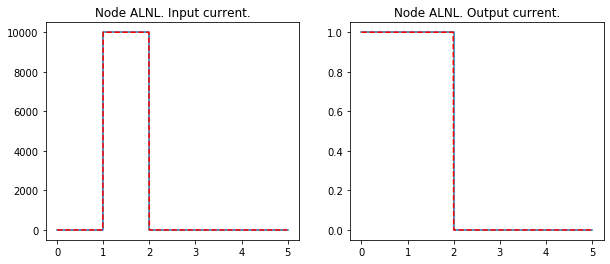

In [207]:
cel.draw_input_output_current(np.random.choice(cel.nodes))

1


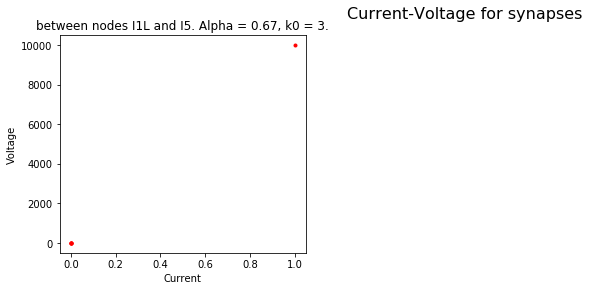

In [214]:
cel.draw_current_voltage_list(np.random.choice(range(len(cel.nodes)), 1))

### celegans2

In [13]:
cel2=neurons_graph()
cel2.add_weighted_edges_from(celegans.values)
starts = np.array(cel2.nodes)[(np.array([len(list(cel2.predecessors(node)))for node in np.array(cel2.nodes)]) == 0)]
starts

array(['ASIR', 'IL2DR', 'AINL', 'ALA', 'CEMDR', 'ASJL', 'URYDL'],
      dtype='<U10')

In [14]:
start_spikes = []
for start in starts:
    start_spikes.append(np.random.randint(0, 2, 10))
#     sc1 = smooth_current(spikes = np.random.randint(0, 2, size))
#     cel.set_input_current_to_node(start, sc1)
#     cel.calculate_output_current_of_node(start, np.random.randint(1, 4))

In [ ]:
cel2.launch(starts, start_spikes, np.random.randint(1,3,len(cel2.nodes)), 10, np.random.random(), np.random.randint(1,5), 0, 10, 100, 10000)

fill all synapses


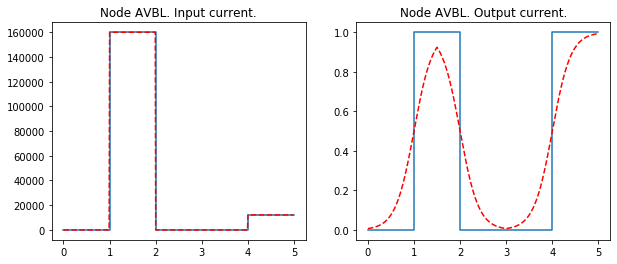

In [22]:
cel2.draw_input_output_current(np.random.choice(cel2.nodes))

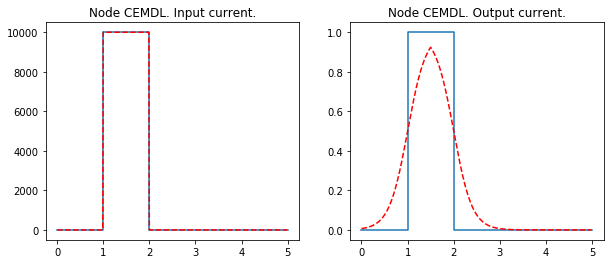

In [31]:
cel2.draw_input_output_current(np.random.choice(cel2.nodes))

1


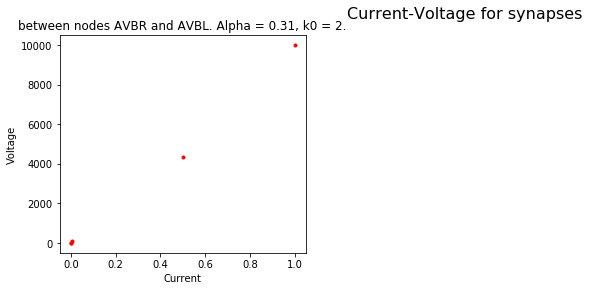

In [39]:
cel2.draw_current_voltage_list(np.random.choice(range(len(cel2.nodes)), 1))

### spikes

In [ ]:
pip install git+https://github.com/miladmozafari/SpykeTorch.git

In [ ]:

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader
# from torch.utils.data import SubsetRandomSampler
# from torchvision.datasets import ImageFolder
# from torch.nn.parameter import Parameter
# import torchvision
# import numpy as np
from SpykeTorch import snn
from SpykeTorch import functional as sf
from SpykeTorch import visualization as vis
from SpykeTorch import utils
from torchvision import transforms

# use_cuda = True
# use_cuda = False

# import matplotlib.pyplot as plt
import random

In [ ]:
kernels = [	utils.GaborKernel(window_size = 29, orientation = 30 + 15),
            utils.GaborKernel(29, 60 + 15),
            utils.GaborKernel(29, 90 + 15),
            utils.GaborKernel(29, 120 + 15),
            utils.GaborKernel(29, 150 + 15),
            utils.GaborKernel(29, 180 + 15)]
filter = utils.Filter(kernels, use_abs = True)

In [ ]:
class PictureTransform:
    def __init__(self, filter, timesteps = 15):
        self.grayscale = transforms.Grayscale()
        self.to_tensor = transforms.ToTensor()
        self.filter = filter
        self.temporal_transform = utils.Intensity2Latency(timesteps)
    def __call__(self, image):
        image = self.grayscale(image)
        image = self.to_tensor(image)
        image.unsqueeze_(0)
        image = self.filter(image)
        temporal_image = self.temporal_transform(image)
        return temporal_image.sign().byte()

In [ ]:
transform = PictureTransform(filter)

In [ ]:
dataset = ImageFolder("drive/MyDrive/datafly/train")
sample_idx = random.randint(0, len(dataset) - 1)
print(sample_idx)
# plotting the sample image
ax = plt.subplot(1,1,1)
plt.setp(ax, xticklabels=[])
plt.setp(ax, yticklabels=[])
plt.xticks([])
plt.yticks([])
plt.imshow(dataset[sample_idx][0])
plt.show()

In [ ]:
import numpy as np

dataset = ImageFolder("drive/MyDrive/datafly/train", transform) # adding transform to the dataset
plt.style.use('seaborn-white')
plt_idx = 0
sw = dataset[sample_idx][0]
print(sw.shape)
for f in range(6):
    for t in range(5):
        plt_idx += 1
        ax = plt.subplot(7, 5, plt_idx)
        plt.setp(ax, xticklabels=[])
        plt.setp(ax, yticklabels=[])
        if t == 0:
            ax.set_ylabel('Feature ' + str(f))
        plt.imshow(sw[t,f].numpy(),cmap='gray')
        if f == 5:
            ax = plt.subplot(7, 5, plt_idx + 5)
            plt.setp(ax, xticklabels=[])
            plt.setp(ax, yticklabels=[])
            if t == 0:
                ax.set_ylabel('Sum')
            ax.set_xlabel('t = ' + str(t))
            plt.imshow(sw[t].sum(dim=0).numpy(),cmap='gray')
plt.show()

In [188]:
cel.synapses[j][0].now_time

1

In [189]:
for j in range(len(cel.edges)):
    if list(cel.edges)[j][0] == node:
        node=list(cel.edges)[j][0]
        ind_node1=list(cel.nodes).index(node)
        print(cel.output_currents[ind_node1].points)
        print('1')
        #cel.synapses[j][0].fill_next_time(cel.output_currents[ind_node1].sigmoid_spikes)

[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1
[[0, 0], [1, 0]]
1


In [169]:
cel.input_currents[0].spikes

[0]

In [110]:
cel.draw_current_voltage_list([7,8])

1


ValueError: num must be 1 <= num <= 3, not 8

<Figure size 1080x288 with 0 Axes>

In [70]:
arr = cel.synapses.copy()

In [71]:
arr

[[<__main__.memristor at 0x2c928be6f28>, 'I1L', 'I6'],
 [<__main__.memristor at 0x2c9277af0b8>, 'I1L', 'pm4D'],
 [<__main__.memristor at 0x2c927c5a8d0>, 'I1L', 'I5'],
 [<__main__.memristor at 0x2c928be6240>, 'I1L', 'M3R'],
 [<__main__.memristor at 0x2c928be6160>, 'I1L', 'MCL'],
 [<__main__.memristor at 0x2c928be6f98>, 'I1L', 'MCR'],
 [<__main__.memristor at 0x2c928be6198>, 'I1L', 'MI'],
 [<__main__.memristor at 0x2c928be6940>, 'I1L', 'pm1'],
 [<__main__.memristor at 0x2c928be6ef0>, 'I1L', 'pm4VL'],
 [<__main__.memristor at 0x2c928be66d8>, 'I1L', 'I3'],
 [<__main__.memristor at 0x2c9298881d0>, 'I1L', 'M2L'],
 [<__main__.memristor at 0x2c929888198>, 'I1L', 'NSML'],
 [<__main__.memristor at 0x2c929888240>, 'I1L', 'pm3VL'],
 [<__main__.memristor at 0x2c929888278>, 'I1L', 'M3L'],
 [<__main__.memristor at 0x2c9298882b0>, 'I1L', 'I2L'],
 [<__main__.memristor at 0x2c9298882e8>, 'I6', 'I1R'],
 [<__main__.memristor at 0x2c929888320>, 'I6', 'I2L'],
 [<__main__.memristor at 0x2c929888358>, 'I6', '